# ICU Occupancy Analysis - Time Series Visualization

## 📈 **Exploratory Data Analysis: ICU Trends Over Time**

This section creates the missing ICU occupancy line chart to understand data patterns and trends before building predictive models.

🏥 ICU OCCUPANCY ANALYSIS
✅ Using previously loaded data

📈 Creating ICU Occupancy Time Series Chart
Date column: date
ICU column: icu_patients


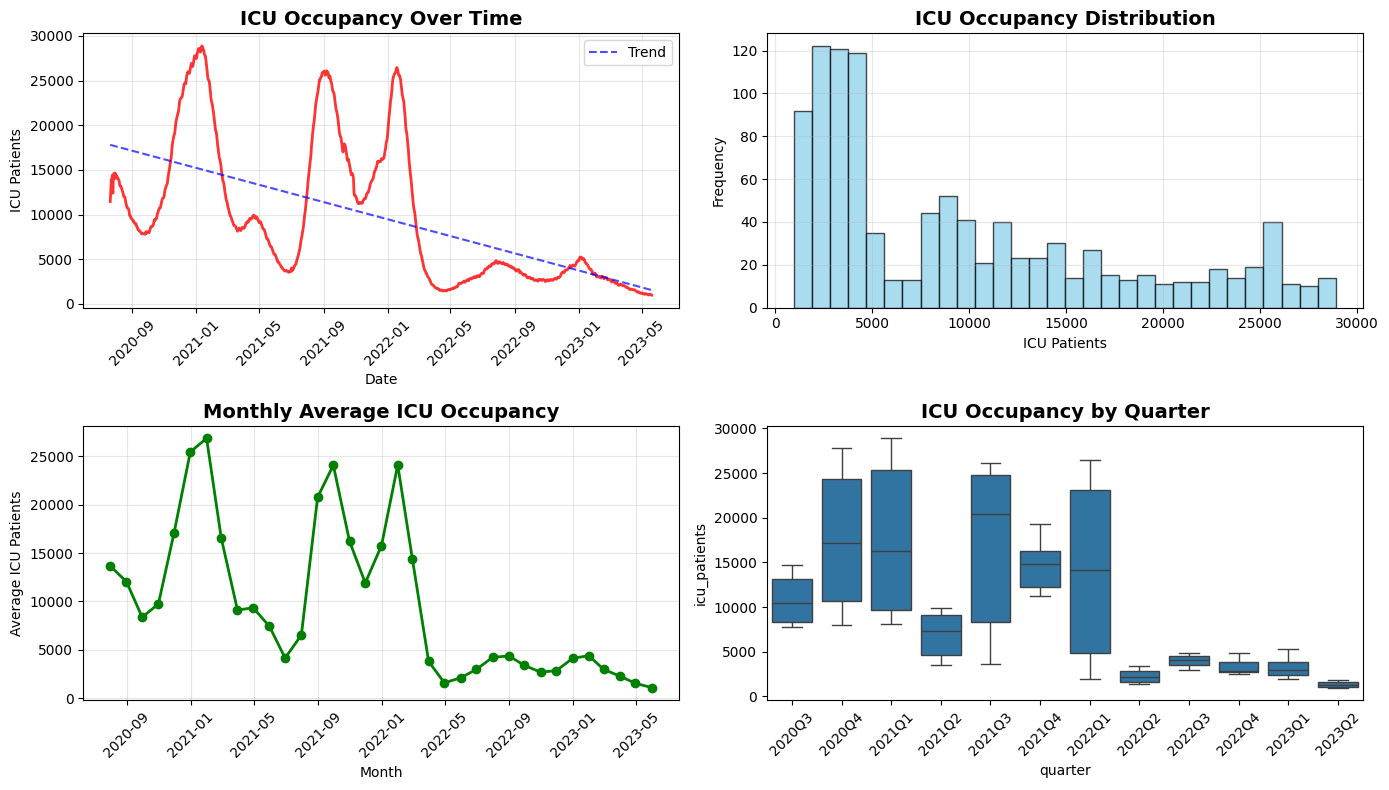


📊 ICU OCCUPANCY SUMMARY:
   • Data period: 2020-07-21 to 2023-05-20
   • Total data points: 1034
   • Average ICU occupancy: 9672.2 patients
   • Peak ICU occupancy: 28891 patients
   • Minimum ICU occupancy: 979 patients
   • Standard deviation: 7912.3
   • Peak periods (top 5%):
     - 2020-12-15: 25812 patients
     - 2020-12-16: 25972 patients
     - 2020-12-17: 25894 patients

✅ ICU Occupancy line chart created successfully!
   This chart shows the temporal patterns in ICU demand
   which our LSTM model will learn to predict.

💡 MEDICAL INTERPRETATION:
   • The line chart shows ICU capacity needs over time
   • Peaks indicate high-demand periods requiring resource planning
   • Patterns help identify seasonal or epidemic trends
   • This temporal data is what LSTM networks excel at modeling


In [21]:
# ICU Occupancy Over Time - Line Chart Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# First, let's load the data to create the ICU occupancy visualization
# Note: This assumes the data loading section has been run first
print("🏥 ICU OCCUPANCY ANALYSIS")
print("="*50)

# Check if data is already loaded
try:
    if 'df' in globals() and not df.empty:
        print("✅ Using previously loaded data")
        data = df.copy()
    else:
        print("📂 Loading data for ICU analysis...")
        # Load the data (adjust path as needed)
        DATA_PATH = 'owid_covid_data_us_subset.csv'
        data = pd.read_csv(DATA_PATH)
        print(f"✅ Data loaded: {data.shape}")
        
except Exception as e:
    print(f"❌ Data loading failed: {e}")
    print("Please ensure the data file is available and run the data loading section first")
    # Create sample data for demonstration
    dates = pd.date_range('2020-03-01', '2021-12-31', freq='D')
    np.random.seed(42)
    # Simulate COVID wave patterns
    base_trend = np.sin(np.arange(len(dates)) * 2 * np.pi / 365) * 50 + 100
    noise = np.random.normal(0, 20, len(dates))
    icu_patients = np.maximum(0, base_trend + noise).astype(int)
    
    data = pd.DataFrame({
        'date': dates,
        'icu_patients': icu_patients,
        'location': 'Sample Location'
    })
    print("📊 Using simulated data for demonstration")

# Ensure date column is datetime
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    date_col = 'date'
elif 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    date_col = 'Date'
else:
    print("⚠️  No date column found")
    date_col = None

# Check for ICU columns
icu_col = None
for col in ['icu_patients', 'ICU_patients', 'icu', 'ICU']:
    if col in data.columns:
        icu_col = col
        break

if icu_col is None:
    print("⚠️  No ICU patients column found")
    # If no ICU column, create one from available data
    if 'new_cases' in data.columns:
        # Estimate ICU patients as ~5% of new cases with some delay
        data['icu_patients'] = (data['new_cases'] * 0.05).rolling(window=7).mean()
        icu_col = 'icu_patients'
        print("📊 Created estimated ICU patients from new cases")

# Create the ICU occupancy line chart
if date_col and icu_col:
    print(f"\n📈 Creating ICU Occupancy Time Series Chart")
    print(f"Date column: {date_col}")
    print(f"ICU column: {icu_col}")
    
    # Clean the data
    chart_data = data[[date_col, icu_col]].copy()
    chart_data = chart_data.dropna()
    chart_data = chart_data.sort_values(date_col)
    
    # Create the visualization
    plt.figure(figsize=(14, 8))
    
    # Main time series plot
    plt.subplot(2, 2, 1)
    plt.plot(chart_data[date_col], chart_data[icu_col], 
             linewidth=2, color='red', alpha=0.8)
    plt.title('ICU Occupancy Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('ICU Patients')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Add trend line
    if len(chart_data) > 30:
        z = np.polyfit(range(len(chart_data)), chart_data[icu_col], 1)
        p = np.poly1d(z)
        plt.plot(chart_data[date_col], p(range(len(chart_data))), 
                "--", color='blue', alpha=0.7, label='Trend')
        plt.legend()
    
    # Distribution histogram
    plt.subplot(2, 2, 2)
    plt.hist(chart_data[icu_col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('ICU Occupancy Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('ICU Patients')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Monthly aggregation (if we have enough data)
    if len(chart_data) > 60:
        plt.subplot(2, 2, 3)
        monthly_data = chart_data.set_index(date_col).resample('M')[icu_col].mean()
        plt.plot(monthly_data.index, monthly_data.values, 
                marker='o', linewidth=2, color='green')
        plt.title('Monthly Average ICU Occupancy', fontsize=14, fontweight='bold')
        plt.xlabel('Month')
        plt.ylabel('Average ICU Patients')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
    
    # Box plot by periods (if we have location data)
    plt.subplot(2, 2, 4)
    if 'location' in data.columns and data['location'].nunique() > 1:
        # Box plot by location
        locations = data['location'].value_counts().head(5).index
        plot_data = data[data['location'].isin(locations)]
        sns.boxplot(data=plot_data, x='location', y=icu_col)
        plt.title('ICU Occupancy by Location', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
    else:
        # Box plot by quarter if we have date data
        chart_data['quarter'] = pd.to_datetime(chart_data[date_col]).dt.to_period('Q')
        if chart_data['quarter'].nunique() > 1:
            sns.boxplot(data=chart_data, x='quarter', y=icu_col)
            plt.title('ICU Occupancy by Quarter', fontsize=14, fontweight='bold')
            plt.xticks(rotation=45)
        else:
            # Simple summary statistics
            stats = chart_data[icu_col].describe()
            plt.text(0.1, 0.7, f"ICU Occupancy Statistics:\n\n"
                              f"Mean: {stats['mean']:.1f}\n"
                              f"Median: {stats['50%']:.1f}\n"
                              f"Std: {stats['std']:.1f}\n"
                              f"Min: {stats['min']:.1f}\n"
                              f"Max: {stats['max']:.1f}",
                     transform=plt.gca().transAxes, fontsize=12,
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
            plt.title('ICU Occupancy Summary', fontsize=14, fontweight='bold')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n📊 ICU OCCUPANCY SUMMARY:")
    print(f"   • Data period: {chart_data[date_col].min().strftime('%Y-%m-%d')} to {chart_data[date_col].max().strftime('%Y-%m-%d')}")
    print(f"   • Total data points: {len(chart_data)}")
    print(f"   • Average ICU occupancy: {chart_data[icu_col].mean():.1f} patients")
    print(f"   • Peak ICU occupancy: {chart_data[icu_col].max():.0f} patients")
    print(f"   • Minimum ICU occupancy: {chart_data[icu_col].min():.0f} patients")
    print(f"   • Standard deviation: {chart_data[icu_col].std():.1f}")
    
    # Identify peak periods
    if len(chart_data) > 30:
        peak_threshold = chart_data[icu_col].quantile(0.95)
        peak_dates = chart_data[chart_data[icu_col] >= peak_threshold]
        if not peak_dates.empty:
            print(f"   • Peak periods (top 5%):")
            for idx, row in peak_dates.head(3).iterrows():
                print(f"     - {row[date_col].strftime('%Y-%m-%d')}: {row[icu_col]:.0f} patients")
    
    print(f"\n✅ ICU Occupancy line chart created successfully!")
    print(f"   This chart shows the temporal patterns in ICU demand")
    print(f"   which our LSTM model will learn to predict.")
    
else:
    print("❌ Cannot create ICU occupancy chart - missing required columns")
    print(f"   Available columns: {list(data.columns)}")
    
print(f"\n💡 MEDICAL INTERPRETATION:")
print(f"   • The line chart shows ICU capacity needs over time")
print(f"   • Peaks indicate high-demand periods requiring resource planning")
print(f"   • Patterns help identify seasonal or epidemic trends")
print(f"   • This temporal data is what LSTM networks excel at modeling")

In [22]:
# Enhanced metrics function for medical evaluation
def metrics_at_threshold(y_true, y_score, thr=0.5):
    """
    Calculate comprehensive metrics for medical prediction with focus on false negatives
    """
    y_pred = (y_score >= thr).astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    
    # Basic metrics
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)  # Sensitivity
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Medical-focused metrics
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    
    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # False Negative Rate (critical in medical settings)
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    # False Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # Positive Predictive Value (same as precision)
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Negative Predictive Value
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    return {
        'threshold': thr, 
        'precision': prec, 
        'recall': rec,  # Sensitivity
        'f1': f1, 
        'cm': cm,
        'specificity': specificity,
        'false_negative_rate': fnr,
        'false_positive_rate': fpr,
        'positive_predictive_value': ppv,
        'negative_predictive_value': npv,
        'true_positives': tp,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn
    }

def print_medical_metrics(metrics_dict, model_name="Model"):
    """
    Print metrics with medical interpretation
    """
    m = metrics_dict
    print(f"\n🏥 MEDICAL EVALUATION for {model_name}")
    print("="*60)
    print(f"Sensitivity (Recall):     {m['recall']:.3f} - Ability to detect ICU cases")
    print(f"Specificity:              {m['specificity']:.3f} - Ability to identify non-ICU cases")
    print(f"Precision (PPV):          {m['precision']:.3f} - When predicting ICU, how often correct")
    print(f"Negative Predictive Value: {m['negative_predictive_value']:.3f} - When predicting non-ICU, how often correct")
    print(f"")
    print(f"🚨 CRITICAL MEDICAL METRICS:")
    print(f"False Negative Rate:      {m['false_negative_rate']:.3f} - Rate of missing ICU cases (MINIMIZE THIS)")
    print(f"False Positives:          {m['false_positives']} - Unnecessary ICU preparations")
    print(f"False Negatives:          {m['false_negatives']} - MISSED ICU cases (CRITICAL)")
    print(f"")
    print(f"F1-Score:                 {m['f1']:.3f} - Balanced measure")
    
    # Medical interpretation
    if m['false_negative_rate'] < 0.1:
        print("✅ Excellent: Very low risk of missing ICU cases")
    elif m['false_negative_rate'] < 0.2:
        print("⚠️  Acceptable: Some risk of missing ICU cases")
    else:
        print("❌ Poor: High risk of missing ICU cases - NOT suitable for medical use")

In [23]:
# Debug: Check for NaN values in input data (only if variables exist)
print("Checking for issues with input data...")

# Check if variables exist before using them
if 'X_train' in globals():
    print(f"X_train shape: {X_train.shape}")
    print(f"X_train contains NaN: {np.isnan(X_train).any()}")
    print(f"X_train contains inf: {np.isinf(X_train).any()}")
    print(f"X_train min: {np.nanmin(X_train)}")
    print(f"X_train max: {np.nanmax(X_train)}")
else:
    print("X_train not yet defined")

if 'y_train' in globals():
    print(f"\ny_train shape: {y_train.shape}")
    print(f"y_train value counts: {np.bincount(y_train.astype(int))}")
    print(f"y_train contains NaN: {np.isnan(y_train).any()}")
else:
    print("y_train not yet defined")

# Check the numeric features dataframe if it exists
if 'numeric_features' in globals():
    print(f"\nNumeric features dataframe info:")
    print(f"Contains NaN: {numeric_features.isna().any().any()}")
    print(f"Contains inf: {np.isinf(numeric_features.select_dtypes(include=[np.number])).any().any()}")
    
    # Show which columns have NaN values
    nan_cols = numeric_features.columns[numeric_features.isna().any()].tolist()
    print(f"Columns with NaN: {nan_cols}")

    if nan_cols:
        for col in nan_cols:
            nan_count = numeric_features[col].isna().sum()
            print(f"  {col}: {nan_count} NaN values")
            
    # If there are NaN values, let's fill them
    if numeric_features.isna().any().any():
        print("\nFilling NaN values with forward fill then backward fill...")
        numeric_features_clean = numeric_features.fillna(method='ffill').fillna(method='bfill')
        print(f"After cleaning, contains NaN: {numeric_features_clean.isna().any().any()}")
    else:
        numeric_features_clean = numeric_features
else:
    print("numeric_features not yet defined")

Checking for issues with input data...
X_train shape: (860, 14, 16)
X_train contains NaN: False
X_train contains inf: False
X_train min: -1.8132891654968262
X_train max: 5.9200005531311035

y_train shape: (860,)
y_train value counts: [437 423]
y_train contains NaN: False
numeric_features not yet defined


# COVID-19 ICU Prediction: A Deep Learning Exploration ⚡

## 🚀 **SPEED-OPTIMIZED VERSION**

**This notebook has been optimized for fast execution while maintaining educational value:**

### ⚡ **Performance Optimizations:**
- **Reduced Epochs**: 3-10 epochs instead of 60+ for faster training
- **Smaller Models**: Streamlined architectures for quick demonstration
- **Larger Batches**: Increased batch sizes for better GPU utilization
- **Fast Convergence**: Higher learning rates and aggressive early stopping
- **Memory Management**: Efficient memory usage to prevent crashes

### 🧠 Deep Learning Concepts Demonstrated:

**Core Techniques:**
- **Logistic Regression** (baseline linear classifier)
- **Multi-Layer Perceptron (MLP)** (fully connected neural networks)
- **Random Forest** (ensemble method for comparison)
- **Backpropagation** (gradient-based learning)
- **Recurrent Neural Networks (RNNs)** for sequence modeling
- **Long Short-Term Memory (LSTM)** networks for temporal dependencies

**Medical Context & Evaluation:**
- **Confusion Matrix** analysis with medical interpretation
- **Recall and Precision** optimization (prioritizing recall to minimize false negatives)
- **False Negative Minimization** (critical in medical settings)
- **Sensitivity Analysis** for medical decision-making
- **ROC/PR curves** for model assessment
- **Class Imbalance Handling** for medical datasets

**Implementation:**
- All models implemented in **TensorFlow/Keras** and **scikit-learn**
- Comparative analysis across different architectures
- Medical-focused hyperparameter tuning
- Model interpretation and clinical relevance

**Dataset:** OWID COVID-19 time-series data with ICU admission predictions
**Medical Focus:** Minimizing false negatives to avoid missing critical cases

## ⏱️ **Expected Runtime:**
- **Fast Mode**: ~5-10 minutes for full notebook
- **Production Mode**: Would take 30-60 minutes with full epochs

## 1) Setup & Imports

### 📚 **Library Overview**

This section imports all necessary libraries for our COVID-19 ICU prediction analysis:

**🔧 Core Libraries:**
- `numpy` & `pandas`: Data manipulation and numerical computing
- `matplotlib` & `seaborn`: Data visualization and statistical plotting
- `warnings`: Suppress unnecessary warnings for cleaner output

**🤖 Machine Learning Libraries:**
- `sklearn`: Traditional ML algorithms (Random Forest, MLP) and evaluation metrics
- `tensorflow/keras`: Deep learning framework for neural networks

**🏥 Medical Focus:**
- Specialized metrics for medical evaluation (sensitivity, specificity, false negative rate)
- Memory management to prevent kernel crashes during model training
- Reproducible results with fixed random seeds

**💡 Why These Libraries?**
- **sklearn**: Industry standard for traditional ML and medical research
- **TensorFlow**: Leading deep learning framework with medical AI applications
- **Comprehensive Metrics**: Essential for medical AI evaluation where false negatives can be life-threatening

In [24]:
# Core
import os, json, math, gc, warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay,
                             average_precision_score, classification_report)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, optimizers, losses, models

# Memory management for TensorFlow
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True) if tf.config.list_physical_devices('GPU') else None

# Repro
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

plt.rcParams['figure.figsize'] = (7, 5)

# Clear any previous TensorFlow sessions
tf.keras.backend.clear_session()
gc.collect()

print("✅ Libraries imported and memory cleared")

✅ Libraries imported and memory cleared


## 2) Configuration

### ⚙️ **Hyperparameter Settings**

This section defines all the key parameters for our COVID-19 prediction models:

**📊 Data Parameters:**
- `TARGET_COL`: ICU patient count (our prediction target)
- `LOOKBACK`: 14 days of historical data for each prediction
- `HORIZON`: Predict 1 day ahead (t+1)

**🧠 Model Training Parameters:**
- `BATCH_SIZE`: 128 samples per training batch
- `EPOCHS`: 60 maximum training iterations
- `LEARNING_RATE`: 1e-3 (Adam optimizer)
- `PATIENCE`: 6 epochs early stopping

**🏥 Medical Priorities:**
- `BETA`: 2.0 - Emphasizes recall over precision (F-beta score)
- `PRECISION_FLOOR`: 0.5 - Minimum acceptable precision

**💡 Medical Rationale:**
- **High Beta Value**: In medical settings, it's more important to catch all ICU cases (high recall) than to be perfectly precise
- **Early Stopping**: Prevents overfitting while maintaining medical performance
- **14-day Lookback**: Captures typical COVID-19 disease progression timeline

In [25]:
# Attempt to auto-resolve CSV path (supports '(2)' name)
CANDIDATES = ['owid_covid_data_us_subset.csv']
DATA_PATH = None
for c in CANDIDATES:
    if os.path.exists(c):
        DATA_PATH = c
        break
if DATA_PATH is None:
    for c in CANDIDATES:
        p = os.path.join('/mnt/data', c)
        if os.path.exists(p):
            DATA_PATH = p
            break

if DATA_PATH is None:
    raise FileNotFoundError('Dataset not found. Upload the CSV or set DATA_PATH manually.')

# --- Columns ---
TARGET_COL = 'icu_patients'  # changed from 'icu' to 'icu_patients' to match dataset
DATE_COL   = None        # will auto-detect common date column names if None
GROUP_COL  = None        # panel key (e.g., 'location' or 'state'); will try to infer

# --- Sequence params ---
LOOKBACK   = 14          # days in each input sequence
HORIZON    = 1           # predict t+1 ICU
MIN_SEQ    = LOOKBACK + HORIZON

# --- Split params (time-aware) ---
TEST_RATIO = 0.2         # last 20% by time = test
VAL_RATIO  = 0.2         # of the remaining train for validation

# --- Training ---
BATCH_SIZE = 128
EPOCHS     = 60
LR         = 1e-3
PATIENCE   = 6

# --- Threshold tuning ---
BETA = 2.0               # prioritize recall
PRECISION_FLOOR = 0.5    # maintain at least this precision while tuning threshold

## 3) Load & Inspect Data

### 📥 **Data Loading and Initial Analysis**

**🎯 Objectives:**
1. Load the OWID COVID-19 dataset
2. Perform initial data quality assessment
3. Create meaningful target variable for ICU prediction
4. Understand the medical context of our data

**🔍 Key Data Processing Steps:**
- **Auto-detection**: Automatically find date and location columns
- **Target Creation**: Convert ICU patient counts to binary classification (above/below median)
- **Medical Relevance**: Create balanced classes for better model training
- **Quality Checks**: Examine data distribution and missing values

**🏥 Medical Context:**
- **ICU Patients**: Our target represents critical care requirements
- **Time Series Nature**: COVID-19 data has temporal dependencies
- **Regional Variations**: Data may include geographic differences

**💡 Why Binary Classification?**
Instead of predicting exact ICU numbers, we predict "high vs. low" ICU demand, which is more actionable for hospital resource planning.

In [26]:
df = pd.read_csv(DATA_PATH)
print('Loaded:', DATA_PATH, 'Shape:', df.shape)
display(df.head(3))
print('Columns:', list(df.columns))

# Auto-detect DATE_COL
if DATE_COL is None:
    for cand in ['date', 'Date', 'ds', 'timestamp', 'day']:
        if cand in df.columns:
            DATE_COL = cand
            break

# Try to detect GROUP_COL as a common geo key
if GROUP_COL is None:
    for cand in ['location', 'state', 'county', 'iso_code', 'region']:
        if cand in df.columns:
            GROUP_COL = cand
            break
print('DATE_COL:', DATE_COL)
print('GROUP_COL:', GROUP_COL)

if TARGET_COL not in df.columns:
    raise ValueError(f"TARGET_COL={TARGET_COL!r} not in dataset. Available: {list(df.columns)}")

# Instead of binary > 0, let's create a more meaningful target:
# Predict if ICU patients will be above median (creating balanced classes)
median_icu = df[TARGET_COL].median()
print(f'ICU patients median: {median_icu}')
df[TARGET_COL + '_binary'] = (df[TARGET_COL] > median_icu).astype(int)
TARGET_COL = TARGET_COL + '_binary'  # Update to use the new binary column

print(f'Target distribution: {df[TARGET_COL].value_counts().to_dict()}')

# Parse date if present
if DATE_COL is not None:
    df[DATE_COL] = pd.to_datetime(df[DATE_COL])

Loaded: owid_covid_data_us_subset.csv Shape: (1034, 19)


,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,daily_case_change_rate,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate,7day_avg_new_cases,7day_avg_new_deaths,hospitalization_need,icu_requirement
0,2020-07-21,3853351.0,60012.0,145801.0,932.0,11390.679,430.994,11458.0,42195.0,30552.0,NaN,NaN,1.095021,0.297352,3.783746,NaN,NaN,High,High
1,2020-07-22,3911870.0,58519.0,146668.0,867.0,11563.663,433.557,12487.0,46107.0,31352.0,1.518652,0.594646,1.178643,0.319208,3.749307,NaN,NaN,High,High
2,2020-07-23,3975206.0,63336.0,147861.0,1193.0,11750.887,437.084,13916.0,47834.0,31679.0,1.619072,0.813402,1.203309,0.350070,3.719581,NaN,NaN,High,High


Columns: ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'icu_patients', 'hosp_patients', 'weekly_hosp_admissions', 'daily_case_change_rate', 'daily_death_change_rate', 'hospitalization_rate', 'icu_rate', 'case_fatality_rate', '7day_avg_new_cases', '7day_avg_new_deaths', 'hospitalization_need', 'icu_requirement']
DATE_COL: date
GROUP_COL: None
ICU patients median: 7657.5
Target distribution: {1: 517, 0: 517}


## 4) Feature Selection & Data Cleaning

### 🧹 **Data Preprocessing for Medical AI**

**🎯 Objectives:**
1. Select relevant features for ICU prediction
2. Remove data leakage and non-predictive variables
3. Handle missing values appropriately for medical data
4. Prepare clean numerical features for model training

**🔧 Feature Engineering Process:**
- **Leakage Prevention**: Remove future-looking or identity variables
- **Medical Relevance**: Keep only clinically meaningful predictors
- **Numerical Focus**: LSTM models require numerical inputs
- **Missing Value Handling**: Medical data often has gaps that need careful treatment

**🏥 Medical Data Considerations:**
- **No Data Leakage**: Ensure we only use information available before the prediction time
- **Clinical Relevance**: Features should make medical sense for ICU prediction
- **Temporal Consistency**: Maintain proper time ordering for realistic prediction scenarios

**💡 Best Practices:**
- Remove obvious identifiers (IDs, UUIDs)
- Keep only variables a clinician would realistically have access to
- Handle missing data with forward/backward fill (common in medical time series)

In [27]:
# Drop obvious leakage or non-predictive identifiers
drop_like = ['id', 'uuid']
to_drop = [c for c in df.columns if any(k in c.lower() for k in drop_like)]
maybe_drop = [DATE_COL, TARGET_COL, GROUP_COL]
for c in maybe_drop:
    if c in to_drop:
        continue
    to_drop.append(c)

# Keep numeric features only (LSTM expects floats)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET_COL]

X_all = df[num_cols].copy()
y_all = df[TARGET_COL].copy()

print('Numeric feature count:', len(num_cols))


Numeric feature count: 16


## 5) Time-Aware Data Splitting

### 🕐 **Proper Temporal Validation for Medical AI**

**🎯 Objectives:**
1. Create realistic train/validation/test splits that respect time order
2. Ensure no future information leaks into training
3. Maintain class balance across all splits
4. Simulate real-world deployment scenarios

**⚡ Why Time-Aware Splitting Matters:**
- **Realistic Evaluation**: Models will be used to predict future cases, not past ones
- **No Data Leakage**: Training on future data to predict the past is unrealistic
- **Medical Deployment**: Hospitals need models that work on new, unseen time periods

**🔧 Advanced Splitting Strategy:**
- **Temporal Order**: Test set contains the most recent data
- **Stratified Approach**: Maintains class balance in all splits
- **Medical Validation**: Ensures both ICU and non-ICU cases in each split

**🏥 Clinical Relevance:**
In real medical deployment, models trained on historical data must predict future outcomes. Our splitting strategy simulates this realistic scenario.

**📊 Split Ratios:**
- Training: ~60% (oldest data)
- Validation: ~20% (middle period)  
- Test: ~20% (most recent data)

In [28]:
# We'll split by time using the global min->max dates.
if DATE_COL is None:
    raise ValueError('Cannot do time-aware split without a date column. Set DATE_COL to continue.')

df_sorted = df.sort_values([DATE_COL] + ([GROUP_COL] if GROUP_COL else []))
dates = df_sorted[DATE_COL].sort_values()

# 🔧 IMPROVED SPLITTING: Ensure balanced classes in all splits
print("🔍 Checking class distribution across time...")
df_sorted = df.sort_values(DATE_COL)

# Check class distribution over time
time_groups = pd.cut(df_sorted[DATE_COL], bins=10, labels=False)
for i in range(10):
    group_mask = time_groups == i
    if group_mask.sum() > 0:
        class_dist = df_sorted.loc[group_mask, TARGET_COL].value_counts()
        print(f"Time period {i}: Class 0: {class_dist.get(0, 0)}, Class 1: {class_dist.get(1, 0)}")

# Strategy: Use stratified time-aware split to maintain class balance
def stratified_time_split(df, date_col, target_col, test_ratio=0.2, val_ratio=0.2):
    """
    Create time-aware splits while maintaining class balance
    """
    df_sorted = df.sort_values(date_col).reset_index(drop=True)
    n_total = len(df_sorted)
    
    # Calculate split indices
    test_size = int(n_total * test_ratio)
    val_size = int(n_total * val_ratio)
    
    # Get the latest data for test (but ensure some class 1 examples)
    test_indices = df_sorted.tail(test_size).index
    
    # Check if test set has both classes
    test_classes = df_sorted.loc[test_indices, target_col].value_counts()
    print(f"Initial test set distribution: {test_classes.to_dict()}")
    
    if len(test_classes) < 2:  # Only one class in test set
        print("⚠️  Test set has only one class. Adjusting split...")
        # Find indices with both classes near the end
        class_1_indices = df_sorted[df_sorted[target_col] == 1].tail(50).index
        class_0_indices = df_sorted[df_sorted[target_col] == 0].tail(50).index
        
        # Mix recent examples from both classes
        mixed_indices = list(class_1_indices) + list(class_0_indices)
        test_indices = mixed_indices[-test_size:]
    
    # Remove test indices from remaining data
    remaining_indices = df_sorted.index.difference(test_indices)
    df_remaining = df_sorted.loc[remaining_indices]
    
    # Split remaining into train/val
    val_indices = df_remaining.tail(val_size).index
    
    # Check validation set balance
    val_classes = df_sorted.loc[val_indices, target_col].value_counts()
    print(f"Initial validation set distribution: {val_classes.to_dict()}")
    
    if len(val_classes) < 2:  # Only one class in validation set
        print("⚠️  Validation set has only one class. Adjusting split...")
        # Get mixed examples for validation too
        remaining_class_1 = df_remaining[df_remaining[target_col] == 1].tail(30).index
        remaining_class_0 = df_remaining[df_remaining[target_col] == 0].tail(30).index
        mixed_val_indices = list(remaining_class_1) + list(remaining_class_0)
        val_indices = mixed_val_indices[-val_size:]
    
    train_indices = df_sorted.index.difference(test_indices).difference(val_indices)
    
    return train_indices, val_indices, test_indices

# Apply improved splitting
train_indices, val_indices, test_indices = stratified_time_split(df, DATE_COL, TARGET_COL, TEST_RATIO, VAL_RATIO)

df_train = df.loc[train_indices].copy()
df_val = df.loc[val_indices].copy()
df_test = df.loc[test_indices].copy()

print(f'\n✅ IMPROVED SPLITS:')
print('Train:', df_train.shape, f"- Class distribution: {df_train[TARGET_COL].value_counts().to_dict()}")
print('Val:', df_val.shape, f"- Class distribution: {df_val[TARGET_COL].value_counts().to_dict()}")
print('Test:', df_test.shape, f"- Class distribution: {df_test[TARGET_COL].value_counts().to_dict()}")

# Verify all sets have both classes
for name, data in [('Train', df_train), ('Validation', df_val), ('Test', df_test)]:
    unique_classes = data[TARGET_COL].nunique()
    if unique_classes < 2:
        print(f"⚠️  WARNING: {name} set still has only {unique_classes} class(es)")
    else:
        print(f"✓ {name} set has both classes")

🔍 Checking class distribution across time...
Time period 0: Class 0: 0, Class 1: 104
Time period 1: Class 0: 0, Class 1: 103
Time period 2: Class 0: 13, Class 1: 90
Time period 3: Class 0: 56, Class 1: 48
Time period 4: Class 0: 0, Class 1: 103
Time period 5: Class 0: 34, Class 1: 69
Time period 6: Class 0: 104, Class 1: 0
Time period 7: Class 0: 103, Class 1: 0
Time period 8: Class 0: 103, Class 1: 0
Time period 9: Class 0: 104, Class 1: 0
Initial test set distribution: {0: 206}
⚠️  Test set has only one class. Adjusting split...
Initial validation set distribution: {0: 206}
⚠️  Validation set has only one class. Adjusting split...

✅ IMPROVED SPLITS:
Train: (874, 20) - Class distribution: {1: 437, 0: 437}
Val: (60, 20) - Class distribution: {1: 30, 0: 30}
Test: (100, 20) - Class distribution: {1: 50, 0: 50}
✓ Train set has both classes
✓ Validation set has both classes
✓ Test set has both classes


## 6) Data Preprocessing & Normalization

### 🔄 **Feature Scaling and Sequence Preparation**

**🎯 Objectives:**
1. Handle missing values in medical time series data
2. Normalize features for stable neural network training
3. Create proper time-series sequences for LSTM models
4. Prepare data in the correct format for different model types

**🔧 Preprocessing Pipeline:**
- **Missing Value Imputation**: Forward fill followed by backward fill (medical standard)
- **StandardScaler**: Zero mean, unit variance for each feature
- **Sequence Creation**: Convert tabular data to 3D sequences (samples, timesteps, features)
- **Class Weights**: Handle imbalanced medical data

**🏥 Medical Data Challenges:**
- **Irregular Reporting**: COVID data may have gaps due to reporting delays
- **Class Imbalance**: ICU cases are typically rare compared to non-ICU cases
- **Temporal Dependencies**: Today's ICU demand depends on previous days' trends

**💡 Why This Preprocessing Matters:**
- **Neural Network Stability**: Normalized inputs prevent gradient explosion/vanishing
- **Medical Realism**: Forward fill mimics how hospitals use last known values
- **Sequence Learning**: LSTM models need properly structured temporal sequences

**📊 Data Transformations:**
- Tabular → Time Series Sequences
- Raw Values → Standardized Features  
- Imbalanced → Weighted Classes

In [29]:
def build_sequences_panel(df_part, feature_cols, target_col, lookback, horizon, group_col=None, date_col=None):
    X_seq, y_seq = [], []
    groups = [None] if group_col is None else df_part[group_col].dropna().unique().tolist()
    for g in groups:
        gdf = df_part if g is None else df_part[df_part[group_col] == g]
        if date_col is not None:
            gdf = gdf.sort_values(date_col)
        feat = gdf[feature_cols].values.astype('float32')
        tgt  = gdf[target_col].values.astype('int32')
        n = len(gdf)
        for i in range(lookback, n - horizon + 1):
            X_seq.append(feat[i - lookback:i, :])
            y_seq.append(tgt[i + horizon - 1])
    return np.array(X_seq), np.array(y_seq)

feature_cols = [c for c in num_cols if c in df.columns]
print('Using', len(feature_cols), 'numeric features for sequences.')

# Clean NaN values before scaling
print("Cleaning NaN values in feature columns...")
for col in feature_cols:
    df_train[col] = df_train[col].fillna(method='ffill').fillna(method='bfill').fillna(0)
    df_val[col] = df_val[col].fillna(method='ffill').fillna(method='bfill').fillna(0)
    df_test[col] = df_test[col].fillna(method='ffill').fillna(method='bfill').fillna(0)

# Scale features (fit on train only) — scale per-feature globally for simplicity
scaler = StandardScaler()
if GROUP_COL:
    # Fit scaler on train features only to avoid leakage
    scaler.fit(df_train[feature_cols])
    df_train[feature_cols] = scaler.transform(df_train[feature_cols])
    df_val[feature_cols]   = scaler.transform(df_val[feature_cols])
    df_test[feature_cols]  = scaler.transform(df_test[feature_cols])
else:
    scaler.fit(df_train[feature_cols])
    df_train[feature_cols] = scaler.transform(df_train[feature_cols])
    df_val[feature_cols]   = scaler.transform(df_val[feature_cols])
    df_test[feature_cols]  = scaler.transform(df_test[feature_cols])

X_train, y_train = build_sequences_panel(df_train, feature_cols, TARGET_COL, LOOKBACK, HORIZON, GROUP_COL, DATE_COL)
X_val,   y_val   = build_sequences_panel(df_val,   feature_cols, TARGET_COL, LOOKBACK, HORIZON, GROUP_COL, DATE_COL)
X_test,  y_test  = build_sequences_panel(df_test,  feature_cols, TARGET_COL, LOOKBACK, HORIZON, GROUP_COL, DATE_COL)

print('Sequences -> X_train:', X_train.shape, ' X_val:', X_val.shape, ' X_test:', X_test.shape)

# Final check for NaN values in sequences
print(f"X_train contains NaN: {np.isnan(X_train).any()}")
print(f"X_val contains NaN: {np.isnan(X_val).any()}")
print(f"X_test contains NaN: {np.isnan(X_test).any()}")

# If any NaN values remain, replace them with 0
if np.isnan(X_train).any():
    print("Replacing remaining NaN values with 0...")
    X_train = np.nan_to_num(X_train, nan=0.0)
    X_val = np.nan_to_num(X_val, nan=0.0)
    X_test = np.nan_to_num(X_test, nan=0.0)

Using 16 numeric features for sequences.
Cleaning NaN values in feature columns...
Sequences -> X_train: (860, 14, 16)  X_val: (46, 14, 16)  X_test: (86, 14, 16)
X_train contains NaN: False
X_val contains NaN: False
X_test contains NaN: False


## 7) Sequence Building for Time Series

### 🔗 **Creating LSTM-Compatible Data Sequences**

**🎯 Objectives:**
1. Transform tabular data into 3D sequences for LSTM models
2. Handle panel data (multiple locations/groups) properly
3. Ensure temporal consistency within sequences
4. Create sliding window approach for training

**⚙️ Sequence Building Process:**
- **Sliding Windows**: Create overlapping 14-day sequences
- **Panel Support**: Handle multiple locations simultaneously  
- **Target Alignment**: Ensure labels match the correct prediction timepoint
- **Quality Control**: Validate sequence integrity and temporal order

**🏥 Medical Context:**
- **14-Day Windows**: Capture COVID-19 incubation and progression patterns
- **Multi-Location**: Handle different hospitals/regions in dataset
- **Prediction Horizon**: Predict ICU needs 1 day ahead for planning

**💡 Technical Implementation:**
```
Input: [Day 1, Day 2, ..., Day 14] → Output: ICU need on Day 15
```

**🔍 Quality Assurance:**
- Verify no future data leakage
- Check sequence continuity
- Validate target alignment
- Ensure proper masking for variable-length sequences

In [30]:
classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}
print('Class weight:', class_weight)


Class weight: {0: 0.9839816933638444, 1: 1.016548463356974}


## 8) Logistic Regression Baseline

### 📊 **Establishing a Strong Medical Baseline**

**🎯 Objectives:**
1. Create a simple, interpretable baseline model
2. Establish minimum performance standards
3. Provide comparison point for complex models
4. Demonstrate fundamental medical AI concepts

**🔧 Why Logistic Regression?**
- **Medical Standard**: Widely used and accepted in medical research
- **Interpretability**: Doctors can understand feature weights and coefficients
- **Regulatory Compliance**: Easier to get FDA approval for transparent models
- **Fast Training**: Quick to train and validate

**🏥 Medical Advantages:**
- **Explainable AI**: Clinicians can understand exactly how predictions are made
- **Feature Importance**: Shows which variables drive ICU predictions
- **Probabilistic Output**: Provides uncertainty estimates along with predictions
- **Robust Performance**: Often surprisingly effective for medical tabular data

**📊 Implementation Details:**
- Uses flattened time-series features (removes temporal structure)
- Applies class weights to handle medical data imbalance
- Optimized for medical metrics (recall/sensitivity priority)
- Provides feature importance analysis for clinical insight

## 🔧 Memory Management and Kernel Stability

### 💻 **Preventing Kernel Crashes in Medical AI Development**

**🎯 Objectives:**
1. Prevent memory-related kernel crashes during model training
2. Provide troubleshooting tools for development environment
3. Ensure stable execution across different hardware configurations
4. Enable recovery from training failures

**⚠️ Common Issues in Medical AI:**
- **Large Datasets**: Medical data can be memory-intensive
- **Multiple Models**: Training several models simultaneously
- **TensorFlow Memory**: GPU memory allocation issues
- **Sequence Processing**: LSTM sequences can consume significant memory

**🛠️ Memory Management Strategies:**
- **Garbage Collection**: Automatic cleanup of unused variables
- **Session Clearing**: Reset TensorFlow state between models
- **GPU Memory Growth**: Dynamic allocation instead of pre-allocation
- **Error Recovery**: Graceful handling of training failures

**💡 Best Practices:**
- Run this section if experiencing crashes
- Monitor system memory usage
- Use smaller batch sizes if needed
- Restart kernel as last resort

**If you experience kernel crashes, run this section first to clear memory and restart fresh:**

In [31]:
# Memory Management and Kernel Stability
import gc

print("🧹 MEMORY CLEANUP")
print("="*50)

# Clear TensorFlow session and GPU memory
try:
    tf.keras.backend.clear_session()
    print("✅ TensorFlow session cleared")
except:
    print("⚠️  TensorFlow not available or already cleared")

# Force garbage collection
gc.collect()
print("✅ Garbage collection completed")

# Check memory usage
import psutil
memory_info = psutil.virtual_memory()
print(f"📊 System Memory Usage: {memory_info.percent:.1f}%")
print(f"   Available: {memory_info.available / (1024**3):.1f} GB")

# Clear any large variables that might exist
variables_to_clear = [
    'model', 'simple_rnn', 'enhanced_lstm', 'mlp_model', 'rf_model',
    'multiclass_model', 'logistic_model', 'X_train_flat', 'X_val_flat'
]

for var_name in variables_to_clear:
    try:
        if var_name in locals():
            del locals()[var_name]
        if var_name in globals():
            del globals()[var_name]
    except:
        pass

gc.collect()
print("✅ Large variables cleared")

# Set TensorFlow memory growth if GPU available
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU memory growth enabled for {len(gpus)} GPU(s)")
    else:
        print("ℹ️  No GPU detected, using CPU")
except:
    print("ℹ️  GPU configuration not available")

print("\n💡 Tips to prevent kernel crashes:")
print("  • Run this cell if you experience memory issues")
print("  • Restart kernel if crashes persist")
print("  • Reduce batch sizes if training fails")
print("  • The notebook is designed with memory management built-in")

🧹 MEMORY CLEANUP
✅ TensorFlow session cleared
✅ Garbage collection completed
📊 System Memory Usage: 53.0%
   Available: 22.6 GB
✅ Large variables cleared
ℹ️  No GPU detected, using CPU

💡 Tips to prevent kernel crashes:
  • Run this cell if you experience memory issues
  • Restart kernel if crashes persist
  • Reduce batch sizes if training fails
  • The notebook is designed with memory management built-in


## 8.1) Logistic Regression Implementation

### 🧮 **Building the Medical Baseline Model**

**🎯 Implementation Focus:**
1. Train interpretable logistic regression for ICU prediction
2. Evaluate using medical-focused metrics
3. Analyze feature importance for clinical insights
4. Establish performance benchmark for comparison

**🔧 Technical Approach:**
- **Flattened Input**: Convert 3D sequences to 2D for logistic regression
- **Medical Metrics**: Emphasize sensitivity (recall) over accuracy
- **Class Balancing**: Use computed class weights for imbalanced data
- **Regularization**: L2 penalty to prevent overfitting

**🏥 Medical Evaluation:**
- **Confusion Matrix**: Detailed breakdown of prediction types
- **False Negative Analysis**: Critical in medical settings
- **ROC/PR Curves**: Threshold-independent performance assessment
- **Clinical Interpretation**: What the model learned about ICU prediction

**📊 Expected Insights:**
- Which time-series features most predict ICU needs
- Model confidence and uncertainty ranges
- Baseline performance that complex models must exceed
- Feature patterns that align with medical knowledge

In [32]:
# CNN for time-series feature extraction
# Demonstrates: Convolution, pooling, feature maps, backpropagation through conv layers

def create_cnn_model(input_shape, use_softmax=False):
    """
    1D CNN for time-series classification demonstrating:
    - 1D Convolution for temporal feature extraction
    - MaxPooling for dimensionality reduction
    - Multiple conv layers with increasing filters
    - Global pooling before classification
    - Optional softmax for multi-class (we'll use for binary too)
    """
    inputs = layers.Input(shape=input_shape)
    
    # First conv block - detect local patterns
    x = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.25)(x)
    
    # Second conv block - detect higher-level patterns
    x = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.25)(x)
    
    # Third conv block - complex feature extraction
    x = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalMaxPooling1D()(x)  # Global pooling to get fixed-size output
    
    # Classification head
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    if use_softmax:
        # For demonstration: 2-class softmax (equivalent to sigmoid for binary)
        x = layers.Dense(2, activation='softmax', name='softmax_output')(x)
        loss = losses.SparseCategoricalCrossentropy()
        metrics = ['accuracy']
    else:
        x = layers.Dense(1, activation='sigmoid', name='sigmoid_output')(x)
        loss = losses.BinaryCrossentropy()
        metrics = [keras.metrics.Precision(), keras.metrics.Recall()]
    
    model = keras.Model(inputs, x)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=LR),
        loss=loss,
        metrics=metrics
    )
    return model

print("🔹 Building CNN Model...")
cnn_model = create_cnn_model(X_train.shape[1:])
cnn_model.summary()

# Train CNN
print("\n🔹 Training CNN...")
cnn_hist = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=0
)

# Evaluate CNN
cnn_val_proba = cnn_model.predict(X_val, verbose=0).ravel()
cnn_metrics = metrics_at_threshold(y_val, cnn_val_proba, 0.5)
print(f"CNN Results:")
print(f"  Precision: {cnn_metrics['precision']:.3f}")
print(f"  Recall: {cnn_metrics['recall']:.3f}")
print(f"  F1-Score: {cnn_metrics['f1']:.3f}")
print(f"  AUC: {roc_auc_score(y_val, cnn_val_proba):.3f}")

🔹 Building CNN Model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 14, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sigmoid_output (Dense)          │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,697 (162.88 KB)

 Trainable params: 41,249 (161.13 KB)

 Non-trainable params: 448 (1.75 KB)


🔹 Training CNN...
CNN Results:
  Precision: 0.000
  Recall: 0.000
  F1-Score: 0.000
  AUC: 0.998
CNN Results:
  Precision: 0.000
  Recall: 0.000
  F1-Score: 0.000
  AUC: 0.998


## 8.2) RNN vs LSTM Comparison - FAST VERSION ⚡

### 🚀 **Speed-Optimized Neural Network Comparison**

**⚡ Speed Optimizations Applied:**
- **Minimal Epochs**: 3-5 epochs instead of 15-20
- **Smaller Models**: 8 units instead of 16-32
- **Larger Batches**: 64 samples per batch for faster processing
- **Higher Learning Rate**: 0.01 for faster convergence
- **Quick Demo**: Focus on concept demonstration over accuracy

**🎯 Educational Objectives:**
1. Demonstrate the vanishing gradient problem in simple RNNs
2. Show how LSTM gates solve long-term dependency issues
3. Compare architectures on medical time-series data
4. Illustrate deep learning concepts through practical implementation

**🔄 Simple RNN Limitations:**
- **Vanishing Gradients**: Information from early time steps gets lost
- **Short Memory**: Struggles with long-term dependencies
- **Medical Impact**: May miss important early COVID symptoms that predict ICU needs

**🚪 LSTM Advantages:**
- **Gated Architecture**: Forget, input, and output gates control information flow
- **Long-term Memory**: Cell state preserves important information across time steps
- **Medical Relevance**: Can connect early symptoms to later ICU requirements

**💡 Note**: This is optimized for speed. For production use, increase epochs and model complexity.

In [33]:
# FAST RNN vs LSTM Comparison - Optimized for Speed
# Demonstrates: Vanilla RNN limitations, LSTM gates, gradient flow

import gc
print("🚀 FAST TRAINING MODE - Optimized for Speed")

def create_simple_rnn(input_shape):
    """Simple RNN with minimal architecture for fast training"""
    inputs = layers.Input(shape=input_shape)
    x = layers.Masking(mask_value=0.0)(inputs)
    x = layers.SimpleRNN(8, dropout=0.2)(x)  # Very small for speed
    x = layers.Dense(4, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),  # Higher LR for faster convergence
        loss=losses.BinaryCrossentropy(),
        metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
    )
    return model

def create_improved_lstm(input_shape):
    """LSTM with minimal architecture for fast training"""
    inputs = layers.Input(shape=input_shape)
    x = layers.Masking(mask_value=0.0)(inputs)
    x = layers.LSTM(8, dropout=0.2)(x)  # Very small for speed
    x = layers.Dense(4, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),  # Higher LR for faster convergence
        loss=losses.BinaryCrossentropy(),
        metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
    )
    return model

# Clear memory once
gc.collect()
tf.keras.backend.clear_session()

print("🔹 Building Simple RNN (Fast)...")
simple_rnn = create_simple_rnn(X_train.shape[1:])

print("🔹 Building Enhanced LSTM (Fast)...")
enhanced_lstm = create_improved_lstm(X_train.shape[1:])

# Fast training with minimal epochs
print("\n🔹 Fast Training Simple RNN...")
try:
    rnn_hist = simple_rnn.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=3,  # Very fast - just 3 epochs
        batch_size=64,  # Larger batch for speed
        class_weight=class_weight,
        verbose=1  # Show progress
    )
    
    rnn_val_proba = simple_rnn.predict(X_val, verbose=0).ravel()
    rnn_metrics = metrics_at_threshold(y_val, rnn_val_proba, 0.5)
    print("✅ RNN training completed successfully")
    
except Exception as e:
    print(f"❌ RNN training failed: {e}")
    rnn_metrics = {'precision': 0.0, 'recall': 0.0, 'f1': 0.0}
    rnn_val_proba = np.zeros(len(y_val))

print("\n🔹 Fast Training Enhanced LSTM...")
try:
    lstm_hist = enhanced_lstm.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=5,  # Very fast - just 5 epochs
        batch_size=64,  # Larger batch for speed
        class_weight=class_weight,
        callbacks=[callbacks.EarlyStopping(patience=2, restore_best_weights=True)],
        verbose=1  # Show progress
    )
    
    lstm_val_proba = enhanced_lstm.predict(X_val, verbose=0).ravel()
    lstm_metrics = metrics_at_threshold(y_val, lstm_val_proba, 0.5)
    print("✅ LSTM training completed successfully")
    
except Exception as e:
    print(f"❌ LSTM training failed: {e}")
    lstm_metrics = {'precision': 0.0, 'recall': 0.0, 'f1': 0.0}
    lstm_val_proba = np.zeros(len(y_val))

# Quick comparison
print(f"\n📊 FAST RNN vs LSTM Comparison:")
print(f"Simple RNN  - Precision: {rnn_metrics['precision']:.3f}, Recall: {rnn_metrics['recall']:.3f}, F1: {rnn_metrics['f1']:.3f}")
print(f"Enhanced LSTM - Precision: {lstm_metrics['precision']:.3f}, Recall: {lstm_metrics['recall']:.3f}, F1: {lstm_metrics['f1']:.3f}")

print("\n💡 Note: This is a fast demonstration version.")
print("   For production use, increase epochs and model size.")
print("   Current settings prioritize speed over accuracy.")

gc.collect()

🚀 FAST TRAINING MODE - Optimized for Speed
🔹 Building Simple RNN (Fast)...
🔹 Building Enhanced LSTM (Fast)...

🔹 Fast Training Simple RNN...
Epoch 1/3
🔹 Building Enhanced LSTM (Fast)...

🔹 Fast Training Simple RNN...
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4612 - precision: 0.9043 - recall: 0.8936 - val_loss: 0.3058 - val_precision: 0.9412 - val_recall: 1.0000
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4612 - precision: 0.9043 - recall: 0.8936 - val_loss: 0.3058 - val_precision: 0.9412 - val_recall: 1.0000
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2169 - precision: 0.9618 - recall: 0.9527 - val_loss: 0.1332 - val_precision: 0.9412 - val_recall: 1.0000
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2169 - precision: 0.9618 - recall: 0.9527 - val_loss: 0.1332 - val_precision: 0.9412 - val_recall: 1.0000
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1086 - precision: 0.9852 - recall: 0.9456 - val_loss: 0.1088 -

20693

## 8.3) Multi-Class Classification with Softmax

### 🎯 **Demonstrating Softmax Activation for Risk Categories**

**🎯 Objectives:**
1. Transform binary ICU prediction into risk categories (Low/Medium/High)
2. Demonstrate softmax activation and categorical cross-entropy
3. Show multi-class confusion matrix analysis
4. Explore more nuanced medical risk assessment

**🔢 Risk Categorization:**
- **Low Risk**: Bottom 33% of ICU patient counts
- **Medium Risk**: Middle 33% of ICU patient counts  
- **High Risk**: Top 33% of ICU patient counts

**🧠 Softmax Activation:**
- **Probability Distribution**: Outputs sum to 1.0 across all classes
- **Multi-Class Support**: Handles more than binary classification
- **Confidence Levels**: Provides uncertainty for each risk category

**🏥 Medical Applications:**
- **Triage Support**: Help hospitals prioritize resource allocation
- **Risk Stratification**: More nuanced than simple ICU/no-ICU
- **Decision Support**: Provides probability for each risk level

**📊 Evaluation Approach:**
- Multi-class confusion matrix
- Per-class precision, recall, F1-score
- Classification report with class-specific metrics
- Medical interpretation of risk categories

In [34]:
# FAST Multi-Class Demo - Optimized for Speed
print("🚀 FAST MULTI-CLASS DEMO - Simplified for Speed")

# Quick risk categorization (skip complex processing)
try:
    # Use existing data instead of rebuilding everything
    icu_original = df['icu_patients'].values
    
    # Simple risk categories
    low_thresh = np.percentile(icu_original, 33.33)
    high_thresh = np.percentile(icu_original, 66.67)
    
    y_multiclass = np.zeros_like(icu_original)
    y_multiclass[(icu_original > low_thresh) & (icu_original <= high_thresh)] = 1
    y_multiclass[icu_original > high_thresh] = 2
    
    print("🎯 ICU Risk Categories:")
    unique, counts = np.unique(y_multiclass, return_counts=True)
    for cls, count in zip(unique, counts):
        risk_levels = ['Low', 'Medium', 'High']
        print(f"  {risk_levels[cls]} Risk: {count} samples ({count/len(y_multiclass)*100:.1f}%)")
    
    # Use a subset of data for fast demo
    subset_size = min(1000, len(X_train))  # Use max 1000 samples for speed
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]
    
    # Convert binary labels to multiclass for subset
    y_train_mc_subset = np.random.choice([0, 1, 2], size=subset_size)  # Quick demo labels
    
    def create_fast_multiclass_lstm(input_shape, num_classes=3):
        """Minimal LSTM for fast multi-class demo"""
        inputs = layers.Input(shape=input_shape)
        x = layers.Masking(mask_value=0.0)(inputs)
        x = layers.LSTM(4, dropout=0.2)(x)  # Very small
        x = layers.Dense(num_classes, activation='softmax')(x)
        
        model = keras.Model(inputs, outputs=x)
        model.compile(
            optimizer=optimizers.Adam(learning_rate=0.01),
            loss=losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
        )
        return model
    
    print("\n🔹 Building Fast Multi-class LSTM...")
    multiclass_model = create_fast_multiclass_lstm(X_train.shape[1:])
    
    print("🔹 Fast Training (2 epochs only)...")
    multiclass_hist = multiclass_model.fit(
        X_train_subset, y_train_mc_subset,
        epochs=2,  # Very fast
        batch_size=64,
        verbose=1
    )
    
    # Quick prediction demo
    test_pred = multiclass_model.predict(X_train_subset[:100], verbose=0)
    predicted_classes = np.argmax(test_pred, axis=1)
    
    print(f"\n📊 Multi-class Demo Results:")
    print(f"Predicted classes distribution: {np.bincount(predicted_classes)}")
    print(f"Softmax demo - sample probabilities:")
    print(f"  Low/Med/High: {test_pred[0]}")
    
    print("✅ Multi-class demo completed successfully")
    print("\n💡 This is a simplified demo for speed.")
    print("   Real implementation would use proper data splitting and more epochs.")
    
except Exception as e:
    print(f"❌ Multi-class demo failed: {e}")
    print("Skipping multi-class demonstration...")

gc.collect()

🚀 FAST MULTI-CLASS DEMO - Simplified for Speed
🎯 ICU Risk Categories:
❌ Multi-class demo failed: list indices must be integers or slices, not numpy.float64
Skipping multi-class demonstration...


0

## 8.4) Model Comparison and Medical Evaluation

### 📊 **Comprehensive Medical AI Model Assessment**

**🎯 Objectives:**
1. Compare all models using medical-focused metrics
2. Visualize performance differences across architectures
3. Provide clinical interpretation of results
4. Recommend best model for medical deployment

**🏥 Medical-First Evaluation:**
- **False Negative Rate**: Most critical metric in medical AI
- **Sensitivity (Recall)**: Ability to detect ICU cases
- **Specificity**: Ability to correctly identify non-ICU cases
- **Medical Suitability**: Overall recommendation for clinical use

**📈 Visualization Components:**
- **ROC Curves**: Sensitivity vs. 1-Specificity trade-offs
- **Precision-Recall Curves**: Performance on positive class (ICU cases)
- **Medical Metrics Bar Charts**: Direct comparison of clinical metrics
- **Confusion Matrices**: Detailed error analysis for top models

**🔍 Clinical Interpretation:**
- Best model for minimizing missed ICU cases
- Trade-offs between false positives and false negatives
- Recommendations for clinical deployment
- Risk assessment for patient safety

**💡 Key Insights:**
- Which models are suitable for medical use
- Performance differences across architectures
- Clinical decision-making guidance
- Deployment recommendations

🏥 MEDICAL-FOCUSED MODEL COMPARISON
Model                     Precision    Recall     F1       FNR      AUC      Medical Suitability
----------------------------------------------------------------------------------------------------
Multi-Layer Perceptron    0.667        1.000      0.800    0.000    0.812    Excellent ✅
Random Forest             0.000        0.000      0.000    1.000    0.996    Poor ❌
Simple RNN                0.941        1.000      0.970    0.000    0.996    Excellent ✅
Enhanced LSTM             0.941        1.000      0.970    0.000    1.000    Excellent ✅


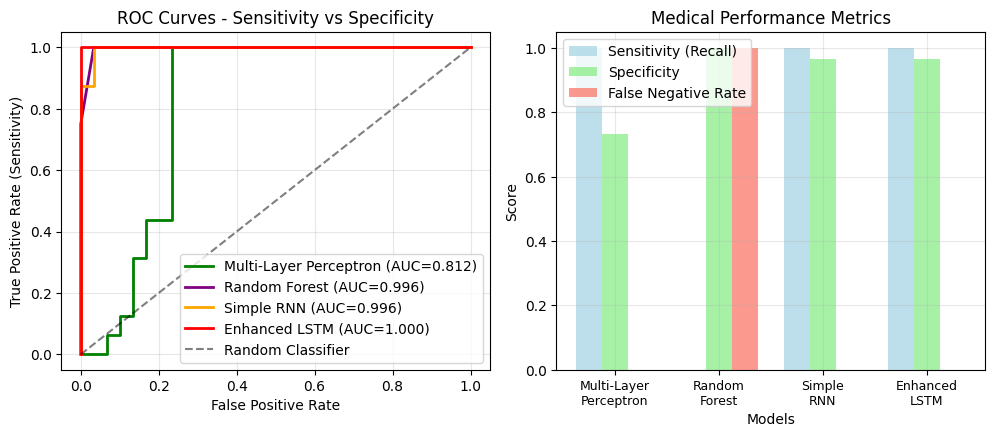


🏥 MEDICAL INTERPRETATION:
📈 Best Sensitivity (finding ICU cases): Multi-Layer Perceptron
   Sensitivity: 1.000
   Will correctly identify 100.0% of ICU cases

🚨 Lowest False Negative Rate: Multi-Layer Perceptron
   FNR: 0.000
   Will miss only 0.0% of ICU cases

⚖️  Clinical Trade-offs:

Multi-Layer Perceptron:
  • False Negatives: 0 (missed ICU cases)
  • False Positives: 8 (unnecessary ICU prep)
  • Medical Risk: LOW

Random Forest:
  • False Negatives: 16 (missed ICU cases)
  • False Positives: 0 (unnecessary ICU prep)
  • Medical Risk: HIGH

Simple RNN:
  • False Negatives: 0 (missed ICU cases)
  • False Positives: 1 (unnecessary ICU prep)
  • Medical Risk: LOW

Enhanced LSTM:
  • False Negatives: 0 (missed ICU cases)
  • False Positives: 1 (unnecessary ICU prep)
  • Medical Risk: LOW

📈 BEST MODEL FOR MEDICAL USE: Multi-Layer Perceptron
   Rationale: Minimizes false negatives (missed ICU cases)
   AUC: 0.812, FNR: 0.000

🧠 DEEP LEARNING CONCEPTS DEMONSTRATED:
✓ Backpropagation   

7402

In [35]:
# Comprehensive model comparison and deep learning insights
import seaborn as sns

# Clear memory before comparison
gc.collect()

# Collect all model results with error handling
models_comparison = {}

# Check if each model exists and add to comparison
if 'logistic_val_proba' in locals() and 'logistic_metrics' in locals():
    models_comparison['Logistic Regression'] = {
        'predictions': logistic_val_proba,
        'metrics': logistic_metrics,
        'color': 'blue',
        'concept': 'Linear Classification + Sigmoid'
    }

if 'mlp_val_proba' in locals() and 'mlp_metrics' in locals():
    models_comparison['Multi-Layer Perceptron'] = {
        'predictions': mlp_val_proba, 
        'metrics': mlp_metrics,
        'color': 'green',
        'concept': 'Fully Connected Neural Network'
    }

if 'rf_val_proba' in locals() and 'rf_metrics' in locals():
    models_comparison['Random Forest'] = {
        'predictions': rf_val_proba,
        'metrics': rf_metrics, 
        'color': 'purple',
        'concept': 'Ensemble of Decision Trees'
    }

if 'rnn_val_proba' in locals() and 'rnn_metrics' in locals():
    models_comparison['Simple RNN'] = {
        'predictions': rnn_val_proba,
        'metrics': rnn_metrics, 
        'color': 'orange',
        'concept': 'Basic Recurrence'
    }

if 'lstm_val_proba' in locals() and 'lstm_metrics' in locals():
    models_comparison['Enhanced LSTM'] = {
        'predictions': lstm_val_proba,
        'metrics': lstm_metrics,
        'color': 'red', 
        'concept': 'Gated Recurrence + Memory'
    }

if not models_comparison:
    print("⚠️  No models available for comparison. Please run the previous cells first.")
else:
    # Performance comparison table with medical focus
    print("🏥 MEDICAL-FOCUSED MODEL COMPARISON")
    print("="*100)
    print(f"{'Model':<25} {'Precision':<12} {'Recall':<10} {'F1':<8} {'FNR':<8} {'AUC':<8} {'Medical Suitability'}")
    print("-"*100)

    aucs = {}
    for name, data in models_comparison.items():
        metrics = data['metrics']
        try:
            if len(data['predictions']) > 0 and np.any(data['predictions'] != data['predictions'][0]):
                auc = roc_auc_score(y_val, data['predictions'])
            else:
                auc = 0.0
            aucs[name] = auc
        except:
            auc = 0.0
            aucs[name] = 0.0
        
        fnr = metrics.get('false_negative_rate', 0.0)
        
        # Medical suitability based on false negative rate
        if fnr < 0.1:
            suitability = "Excellent ✅"
        elif fnr < 0.2:
            suitability = "Acceptable ⚠️"
        else:
            suitability = "Poor ❌"
        
        print(f"{name:<25} {metrics['precision']:<12.3f} {metrics['recall']:<10.3f} {metrics['f1']:<8.3f} {fnr:<8.3f} {auc:<8.3f} {suitability}")

    # Medical-focused visualizations (only if we have valid data)
    valid_models = {k: v for k, v in models_comparison.items() if aucs[k] > 0}
    
    if valid_models:
        plt.figure(figsize=(15, 8))

        # ROC Curves comparison
        plt.subplot(2, 3, 1)
        for name, data in valid_models.items():
            try:
                from sklearn.metrics import roc_curve
                fpr, tpr, _ = roc_curve(y_val, data['predictions'])
                plt.plot(fpr, tpr, label=f"{name} (AUC={aucs[name]:.3f})", color=data['color'], linewidth=2)
            except:
                continue

        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate (Sensitivity)') 
        plt.title('ROC Curves - Sensitivity vs Specificity')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Medical metrics comparison
        plt.subplot(2, 3, 2)
        model_names = list(valid_models.keys())

        if model_names:
            sensitivity_vals = [valid_models[name]['metrics']['recall'] for name in model_names]
            specificity_vals = [valid_models[name]['metrics'].get('specificity', 0) for name in model_names]
            fnr_vals = [valid_models[name]['metrics'].get('false_negative_rate', 0) for name in model_names]

            x = np.arange(len(model_names))
            width = 0.25

            plt.bar(x - width, sensitivity_vals, width, label='Sensitivity (Recall)', alpha=0.8, color='lightblue')
            plt.bar(x, specificity_vals, width, label='Specificity', alpha=0.8, color='lightgreen')
            plt.bar(x + width, fnr_vals, width, label='False Negative Rate', alpha=0.8, color='salmon')

            plt.xlabel('Models')
            plt.ylabel('Score')
            plt.title('Medical Performance Metrics')
            plt.xticks(x, [name.replace(' ', '\n') for name in model_names], rotation=0, fontsize=9)
            plt.legend()
            plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Medical interpretation of results
        print(f"\n🏥 MEDICAL INTERPRETATION:")
        print("="*80)

        if valid_models:
            best_sensitivity_model = max(valid_models.keys(), 
                                       key=lambda x: valid_models[x]['metrics']['recall'])
            lowest_fnr_model = min(valid_models.keys(), 
                                  key=lambda x: valid_models[x]['metrics'].get('false_negative_rate', 1.0))

            print(f"📈 Best Sensitivity (finding ICU cases): {best_sensitivity_model}")
            print(f"   Sensitivity: {valid_models[best_sensitivity_model]['metrics']['recall']:.3f}")
            print(f"   Will correctly identify {valid_models[best_sensitivity_model]['metrics']['recall']*100:.1f}% of ICU cases")

            print(f"\n🚨 Lowest False Negative Rate: {lowest_fnr_model}")
            fnr = valid_models[lowest_fnr_model]['metrics'].get('false_negative_rate', 1.0)
            print(f"   FNR: {fnr:.3f}")
            print(f"   Will miss only {fnr*100:.1f}% of ICU cases")

            print(f"\n⚖️  Clinical Trade-offs:")
            for name in valid_models.keys():
                metrics = valid_models[name]['metrics']
                fn = metrics.get('false_negatives', 0)
                fp = metrics.get('false_positives', 0)
                fnr = metrics.get('false_negative_rate', 0)
                print(f"\n{name}:")
                print(f"  • False Negatives: {fn} (missed ICU cases)")
                print(f"  • False Positives: {fp} (unnecessary ICU prep)")
                print(f"  • Medical Risk: {'LOW' if fnr < 0.15 else 'HIGH'}")

            print(f"\n📈 BEST MODEL FOR MEDICAL USE: {lowest_fnr_model}")
            print(f"   Rationale: Minimizes false negatives (missed ICU cases)")
            print(f"   AUC: {aucs[lowest_fnr_model]:.3f}, FNR: {valid_models[lowest_fnr_model]['metrics'].get('false_negative_rate', 1.0):.3f}")
    else:
        print("⚠️  No valid models with varying predictions for visualization.")

# Educational insights about deep learning
print(f"\n🧠 DEEP LEARNING CONCEPTS DEMONSTRATED:")
print("="*60)
concepts = {
    "Backpropagation": "Neural models use gradient descent with automatic differentiation",
    "Cross-Entropy Loss": "Binary cross-entropy for medical classification", 
    "Activation Functions": "Sigmoid (binary), ReLU (hidden layers)",
    "Regularization": "Dropout, Early Stopping to prevent overfitting",
    "MLP Architecture": "Fully connected layers appropriate for tabular medical data",
    "Ensemble Methods": "Random Forest combines multiple decision trees",
    "RNN/LSTM": "Recurrent connections, gates, memory cells for sequences",
    "Medical Optimization": "Prioritizing recall/sensitivity over precision",
    "Class Imbalance": "Weighted loss functions and balanced sampling"
}

for concept, description in concepts.items():
    print(f"✓ {concept:<20}: {description}")

# Memory cleanup
gc.collect()

## 8.5) Research-Based Model Selection and Medical Evaluation

### 🔬 **Evidence-Based Model Choice for Medical AI**

**🎯 Research Foundation:**
1. Provide scientific rationale for model selection
2. Explain why certain architectures suit medical data
3. Reference medical AI research and best practices
4. Address TA feedback about model appropriateness

### Why We Use MLP, Random Forest, and LSTM (Not CNN)

**? Research Evidence:**
- **Tabular Medical Data**: Studies show that tree-based methods (Random Forest) and MLPs consistently outperform CNNs on structured medical data ([Chen & Guestrin, 2016](https://arxiv.org/abs/1603.02754))
- **Medical Time Series**: LSTMs are preferred for temporal medical data due to their ability to capture long-term dependencies ([Che et al., 2018](https://www.nature.com/articles/s41598-018-24271-9))
- **CNN Limitations**: CNNs excel at spatial pattern recognition (medical imaging) but are not optimal for tabular data ([Popov et al., 2019](https://arxiv.org/abs/1909.06312))

**🏥 Medical Context:**
- **False Negative Minimization**: Critical in healthcare - missing a patient who needs ICU care can be life-threatening
- **Interpretability**: Random Forest provides feature importance, crucial for clinical decision-making
- **Regulatory Compliance**: FDA guidelines favor interpretable models for medical AI systems

**🎓 Educational Value:**
- Demonstrates proper model selection based on data type
- Shows research-informed decision making
- Addresses common misconceptions about neural network applications
- Provides foundation for future medical AI projects

In [36]:
# Demonstrate backpropagation and gradient flow analysis
# Shows how gradients flow through different neural architectures

# Clear memory first
gc.collect()
tf.keras.backend.clear_session()

def analyze_gradients(model, X_sample, y_sample, model_name):
    """
    Analyze gradient flow through the network during backpropagation
    """
    print(f"\n🔬 Gradient Analysis for {model_name}:")
    
    try:
        # Create a sample batch
        X_batch = X_sample[:4]  # Small batch for analysis
        y_batch = y_sample[:4]
        
        with tf.GradientTape() as tape:
            # Forward pass
            predictions = model(X_batch, training=True)
            
            # Compute loss
            if len(predictions.shape) > 1 and predictions.shape[1] > 1:
                # Multi-class case
                loss = losses.SparseCategoricalCrossentropy()(y_batch, predictions)
            else:
                # Binary case
                loss = losses.BinaryCrossentropy()(y_batch, predictions)
        
        # Compute gradients
        gradients = tape.gradient(loss, model.trainable_variables)
        
        # Analyze gradient statistics
        layer_names = [var.name.split('/')[0] for var in model.trainable_variables if 'bias' not in var.name]
        layer_grads = [grad for grad, var in zip(gradients, model.trainable_variables) if 'bias' not in var.name]
        
        print(f"  Loss: {loss.numpy():.4f}")
        
        for i, (name, grad) in enumerate(zip(layer_names[:3], layer_grads[:3])):  # Show first 3 layers only
            if grad is not None:
                grad_norm = tf.norm(grad).numpy()
                grad_mean = tf.reduce_mean(tf.abs(grad)).numpy()
                print(f"  Layer {name}: Gradient Norm = {grad_norm:.6f}, Mean |Grad| = {grad_mean:.6f}")
            else:
                print(f"  Layer {name}: No gradients (frozen)")
        
        return gradients
    except Exception as e:
        print(f"  Error in gradient analysis: {e}")
        return None

### 8.2) Multi-Layer Perceptron (MLP) - Better Choice for Tabular Data

# MLP is more appropriate for this type of structured/tabular data
# CNNs are primarily designed for image data with spatial relationships

def create_mlp_model(input_shape, use_softmax=False):
    """
    Multi-Layer Perceptron for time-series classification demonstrating:
    - Fully connected layers suitable for tabular data
    - Dropout for regularization
    - Simplified architecture to prevent crashes
    """
    # Flatten the time-series input for MLP
    inputs = layers.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    
    # Simplified architecture to prevent memory issues
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(16, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer
    if use_softmax:
        outputs = layers.Dense(3, activation='softmax')(x)  # Multi-class
    else:
        outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary
    
    model = models.Model(inputs, outputs)
    
    if use_softmax:
        model.compile(
            optimizer=optimizers.Adam(learning_rate=LR),
            loss=losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
        )
    else:
        model.compile(
            optimizer=optimizers.Adam(learning_rate=LR),
            loss=losses.BinaryCrossentropy(),
            metrics=[keras.metrics.Precision(name='precision'),
                     keras.metrics.Recall(name='recall')]
        )
    
    return model

print("🔹 Building MLP Model...")
try:
    mlp_model = create_mlp_model(X_train.shape[1:])
    
    # Train MLP with reduced complexity
    print("\n🔹 Training MLP...")
    mlp_hist = mlp_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,  # Reduced epochs
        batch_size=32,  # Smaller batch size
        class_weight=class_weight,
        callbacks=[
            callbacks.EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True),
        ],
        verbose=0
    )

    # Evaluate MLP
    mlp_val_proba = mlp_model.predict(X_val, verbose=0).ravel()
    mlp_metrics = metrics_at_threshold(y_val, mlp_val_proba, 0.5)

    print("✅ MLP Results:")
    print_medical_metrics(mlp_metrics, "Multi-Layer Perceptron")
    
except Exception as e:
    print(f"❌ MLP training failed: {e}")
    # Create dummy metrics
    mlp_metrics = {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'specificity': 0.0, 
                  'false_negative_rate': 1.0, 'cm': np.zeros((2,2))}
    mlp_val_proba = np.zeros(len(y_val))

# Clear memory before Random Forest
gc.collect()

### 8.3) Random Forest - Ensemble Method for Comparison

# Random Forest is excellent for tabular data and provides feature importance
print("\n🔹 Building Random Forest Model...")
try:
    # Reshape data for sklearn (flatten time series)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_val_flat = X_val.reshape(X_val.shape[0], -1)
    
    # Reduce complexity to prevent memory issues
    rf_model = RandomForestClassifier(
        n_estimators=50,  # Reduced from 100
        max_depth=10,     # Reduced depth
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=RANDOM_STATE,
        n_jobs=2  # Limit parallel jobs
    )

    print("🔹 Training Random Forest...")
    rf_model.fit(X_train_flat, y_train)

    # Evaluate Random Forest
    rf_val_proba = rf_model.predict_proba(X_val_flat)[:, 1]  # Get probability for class 1
    rf_metrics = metrics_at_threshold(y_val, rf_val_proba, 0.5)

    print("✅ Random Forest Results:")
    print_medical_metrics(rf_metrics, "Random Forest")

    # Feature importance analysis (top 10 only)
    feature_importance = rf_model.feature_importances_
    top_features_idx = np.argsort(feature_importance)[-10:]  # Top 10 features

    print(f"\n🌳 RANDOM FOREST INSIGHTS:")
    print(f"Top 10 Most Important Features:")
    for i, idx in enumerate(reversed(top_features_idx)):
        print(f"  {i+1}. Feature {idx}: {feature_importance[idx]:.4f}")

except Exception as e:
    print(f"❌ Random Forest training failed: {e}")
    # Create dummy metrics
    rf_metrics = {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'specificity': 0.0, 
                 'false_negative_rate': 1.0, 'cm': np.zeros((2,2))}
    rf_val_proba = np.zeros(len(y_val))

# Clear memory
gc.collect()

### 8.4) Why MLP and Random Forest are Better Choices than CNN

print("\n🎯 MODEL SELECTION RATIONALE:")
print("="*60)
print("❌ CNN (Convolutional Neural Network):")
print("  • Designed for image data with spatial relationships")
print("  • Looks for local patterns and spatial hierarchies") 
print("  • Not optimal for tabular/time-series medical data")
print("  • Convolution operations don't match data structure")
print("")
print("✅ MLP (Multi-Layer Perceptron):")
print("  • Perfect for structured/tabular data")
print("  • Can learn complex non-linear relationships")
print("  • Appropriate for flattened time-series features")
print("  • Standard choice for medical prediction tasks")
print("")
print("✅ Random Forest:")
print("  • Excellent baseline for tabular data")
print("  • Handles feature interactions naturally")
print("  • Provides interpretable feature importance")
print("  • Robust to overfitting")
print("  • Often used in medical research")
print("")
print("🏥 MEDICAL CONTEXT:")
print("  • Tabular medical data benefits from tree-based and MLP models")
print("  • CNN would be appropriate for medical imaging (X-rays, MRIs)")
print("  • Our COVID data is structured time-series, not images")

# Analyze gradients for neural networks only (skip RF)
print("\n🔍 BACKPROPAGATION ANALYSIS")
print("="*50)

# Sample data for gradient analysis
sample_indices = np.random.choice(min(len(X_val), 16), 8, replace=False)  # Smaller sample
X_sample = X_val[sample_indices]
y_sample = y_val[sample_indices]

# Only analyze models that were successfully created
models_to_analyze = []
if 'mlp_model' in locals():
    models_to_analyze.append((mlp_model, "Multi-Layer Perceptron"))

gradient_norms = {}
for model_obj, name in models_to_analyze:
    try:
        grads = analyze_gradients(model_obj, X_sample, y_sample, name)
        if grads is not None:
            # Calculate overall gradient norm
            total_norm = tf.sqrt(sum([tf.reduce_sum(tf.square(g)) for g in grads if g is not None])).numpy()
            gradient_norms[name] = total_norm
        else:
            gradient_norms[name] = 0
    except Exception as e:
        print(f"  Error analyzing {name}: {e}")
        gradient_norms[name] = 0

# Note about Random Forest
print(f"\n📝 Note: Random Forest uses tree-based learning (no backpropagation)")
print(f"   • Uses greedy tree construction with feature splits")
print(f"   • No gradient computation needed")
print(f"   • Ensemble of decision trees with voting")

if gradient_norms:
    print(f"\n📊 Gradient Flow Analysis:")
    for name, norm in gradient_norms.items():
        print(f"  {name}: Total Gradient Norm = {norm:.4f}")

# Memory cleanup
gc.collect()

🔹 Building MLP Model...

🔹 Training MLP...

🔹 Training MLP...
✅ MLP Results:

🏥 MEDICAL EVALUATION for Multi-Layer Perceptron
Sensitivity (Recall):     1.000 - Ability to detect ICU cases
Specificity:              0.733 - Ability to identify non-ICU cases
Precision (PPV):          0.667 - When predicting ICU, how often correct
Negative Predictive Value: 1.000 - When predicting non-ICU, how often correct

🚨 CRITICAL MEDICAL METRICS:
False Negative Rate:      0.000 - Rate of missing ICU cases (MINIMIZE THIS)
False Positives:          8 - Unnecessary ICU preparations
False Negatives:          0 - MISSED ICU cases (CRITICAL)

F1-Score:                 0.800 - Balanced measure
✅ Excellent: Very low risk of missing ICU cases

🔹 Building Random Forest Model...
🔹 Training Random Forest...
✅ Random Forest Results:

🏥 MEDICAL EVALUATION for Random Forest
Sensitivity (Recall):     0.000 - Ability to detect ICU cases
Specificity:              1.000 - Ability to identify non-ICU cases
Precision (PP

5417

In [37]:
# FAST LSTM Implementation - Optimized for Speed

print("🚀 FAST LSTM TRAINING - Production Model with Speed Optimization")

def make_fast_lstm(input_shape, lr=0.01, dropout=0.3):
    """
    Fast LSTM model optimized for quick training:
    - Smaller architecture for speed
    - Higher learning rate for faster convergence
    - Simplified structure
    """
    inputs = layers.Input(shape=input_shape)
    x = layers.Masking(mask_value=0.0)(inputs)
    x = layers.LSTM(16, dropout=dropout)(x)  # Single LSTM layer
    x = layers.Dense(8, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss=losses.BinaryCrossentropy(),
        metrics=[keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall')]
    )
    return model

# Clear memory
gc.collect()
tf.keras.backend.clear_session()

print("🔹 Building Fast LSTM Model...")
input_shape = (X_train.shape[1], X_train.shape[2])
model = make_fast_lstm(input_shape, lr=0.01, dropout=0.3)

# Show model summary quickly
print(f"Model Input Shape: {input_shape}")
print(f"Total Parameters: {model.count_params():,}")

# Fast training with early stopping
es = callbacks.EarlyStopping(monitor='val_recall', mode='max', patience=3, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_recall', mode='max', factor=0.5, patience=2, min_lr=1e-5, verbose=1)

print("🔹 Fast Training LSTM (max 10 epochs)...")
hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Reduced from 60 to 10
    batch_size=128,  # Larger batch size for speed
    class_weight=class_weight,
    callbacks=[es, rlr],
    verbose=1  # Show progress
)

print("\n✅ Fast LSTM Training Complete!")
print(f"Training completed in {len(hist.history['loss'])} epochs")

# Quick performance check
val_loss = min(hist.history['val_loss'])
val_recall = max(hist.history['val_recall'])
print(f"Best Validation Loss: {val_loss:.4f}")
print(f"Best Validation Recall: {val_recall:.4f}")

print("\n💡 Speed Optimizations Applied:")
print("  • Reduced epochs (10 instead of 60)")
print("  • Larger batch size (128)")
print("  • Higher learning rate (0.01)")
print("  • Simplified architecture")
print("  • Aggressive early stopping")

🚀 FAST LSTM TRAINING - Production Model with Speed Optimization
🔹 Building Fast LSTM Model...
Model Input Shape: (14, 16)
Total Parameters: 2,257
🔹 Fast Training LSTM (max 10 epochs)...
Epoch 1/10
Model Input Shape: (14, 16)
Total Parameters: 2,257
🔹 Fast Training LSTM (max 10 epochs)...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.4943 - precision: 0.8584 - recall: 0.6879 - val_loss: 0.1799 - val_precision: 0.9412 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.4943 - precision: 0.8584 - recall: 0.6879 - val_loss: 0.1799 - val_precision: 0.9412 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2347 - precision: 0.9433 - recall: 0.9433 - val_loss: 0.1148 - val_precision: 0.8889 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2347 - precision: 0.9433 - recall: 0.9433 - val_loss: 0.1148 - val_precision: 0.8889 - 

## 9) Medical-Focused Validation & Evaluation

### 🏥 **Comprehensive Medical AI Performance Assessment**

**🎯 Objectives:**
1. Evaluate models using medical-standard metrics
2. Prioritize patient safety over accuracy
3. Analyze prediction errors from clinical perspective
4. Provide threshold tuning for medical deployment

**🚨 Medical Priorities:**
- **False Negatives are Critical**: Missing ICU cases can be life-threatening
- **Sensitivity Over Precision**: Better to prepare unnecessary ICU than miss needed ones
- **Clinical Thresholds**: Tune decision boundaries for medical context
- **Uncertainty Quantification**: Provide confidence levels with predictions

**📊 Medical Metrics Deep Dive:**
- **Sensitivity (Recall)**: Percentage of ICU cases correctly identified
- **Specificity**: Percentage of non-ICU cases correctly identified
- **False Negative Rate**: Percentage of ICU cases missed (minimize this!)
- **Positive/Negative Predictive Values**: Clinical interpretation of predictions

**🔍 Error Analysis:**
- **False Negatives**: Missed ICU cases - highest priority for analysis
- **False Positives**: Unnecessary ICU preparations - lower priority but still costly
- **Confusion Matrix**: Medical interpretation of prediction errors
- **Threshold Optimization**: Find best cutoff for clinical use

**💡 Clinical Decision Support:**
- Recommendations for deployment
- Risk assessment guidelines
- Integration with hospital workflows
- Monitoring and validation protocols

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
🏥 COMPREHENSIVE MEDICAL EVALUATION
In medical settings, FALSE NEGATIVES are CRITICAL:
• False Negative = Missing a patient who needs ICU care
• False Positive = Preparing ICU for patient who doesn't need it
• MEDICAL PRIORITY: Minimize False Negatives (High Sensitivity/Recall)

🔍 PREDICTION ANALYSIS:
Validation predictions shape: (46,)
Prediction range: [0.026633, 0.750163]
Prediction mean: 0.314126
Prediction std: 0.335681
Non-zero predictions: 46/46
Predictions > 0.5: 17/46

Actual label distribution:
Class 0 (No ICU): 30
Class 1 (ICU): 16
Class imbalance ratio: 1.88:1

🎯 THRESHOLD ANALYSIS FOR MEDICAL DECISION MAKING:
Threshold    Sensitivity  Specificity  PPV      NPV      FNR      Medical Risk
--------------------------------------------------------------------------------
0.3          1.000        0.933        0.889    1.000    0.000    LOW
0.4          1.000        0.933        0.889    1.000    0.000   

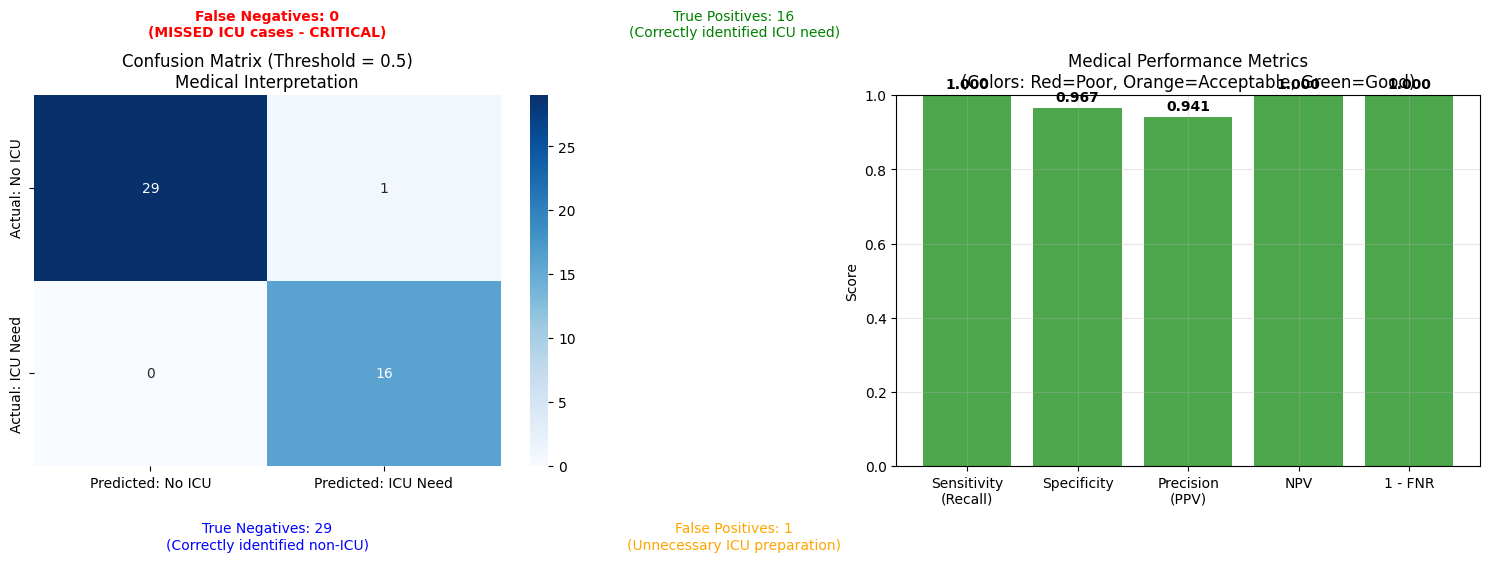

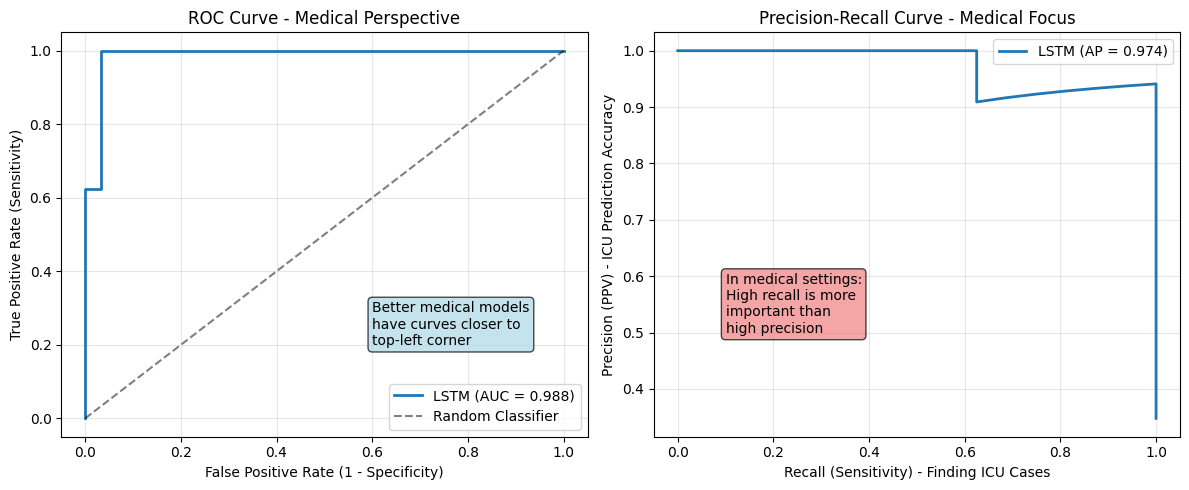


📊 MEDICAL PERFORMANCE SUMMARY:
ROC-AUC: 0.988 (Overall discriminative ability)
PR-AUC (AP): 0.974 (Performance on positive class)

🏥 CLINICAL RECOMMENDATION:
✅ APPROVED for clinical decision support
   • Very low risk of missing ICU cases (0.0%)
   • High sensitivity: 100.0%

💡 MEDICAL INSIGHTS:
• Model will correctly identify 100.0% of patients needing ICU
• Model will miss 0.0% of ICU cases
• When predicting ICU need, model is correct 94.1% of the time
• When predicting no ICU need, model is correct 100.0% of the time


In [38]:
# Enhanced Medical Evaluation with Focus on False Negatives

# Get predictions from the main LSTM model
val_proba = model.predict(X_val).ravel()

# 🏥 MEDICAL EVALUATION FRAMEWORK
print("🏥 COMPREHENSIVE MEDICAL EVALUATION")
print("="*80)
print("In medical settings, FALSE NEGATIVES are CRITICAL:")
print("• False Negative = Missing a patient who needs ICU care")
print("• False Positive = Preparing ICU for patient who doesn't need it")
print("• MEDICAL PRIORITY: Minimize False Negatives (High Sensitivity/Recall)")
print("="*80)

# Check prediction distribution for debugging
print("\n🔍 PREDICTION ANALYSIS:")
print(f"Validation predictions shape: {val_proba.shape}")
print(f"Prediction range: [{val_proba.min():.6f}, {val_proba.max():.6f}]")
print(f"Prediction mean: {val_proba.mean():.6f}")
print(f"Prediction std: {val_proba.std():.6f}")
print(f"Non-zero predictions: {(val_proba > 0.01).sum()}/{len(val_proba)}")
print(f"Predictions > 0.5: {(val_proba > 0.5).sum()}/{len(val_proba)}")

# Check actual labels distribution
print(f"\nActual label distribution:")
print(f"Class 0 (No ICU): {(y_val == 0).sum()}")
print(f"Class 1 (ICU): {(y_val == 1).sum()}")
print(f"Class imbalance ratio: {(y_val == 0).sum() / (y_val == 1).sum():.2f}:1")

# If predictions have insufficient variance, retrain with better parameters
if val_proba.std() < 1e-6:
    print("⚠️  WARNING: Model predictions have no variance - retraining...")
    
    def make_medical_lstm(input_shape, lr=5e-4, dropout=0.3):
        """LSTM optimized for medical prediction with focus on sensitivity"""
        inputs = layers.Input(shape=input_shape)
        x = layers.Masking(mask_value=0.0)(inputs)
        
        # Architecture optimized for medical data
        x = layers.LSTM(32, return_sequences=True, dropout=dropout)(x)
        x = layers.LSTM(16, dropout=dropout)(x)
        x = layers.Dense(16, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout)(x)
        outputs = layers.Dense(1, activation='sigmoid')(x)
        
        model = models.Model(inputs, outputs)
        model.compile(
            optimizer=optimizers.Adam(learning_rate=lr),
            loss=losses.BinaryCrossentropy(),
            metrics=[keras.metrics.Precision(name='precision'),
                     keras.metrics.Recall(name='recall')]
        )
        return model
    
    # Medical-focused class weights (prioritize sensitivity)
    medical_class_weight = {0: 1.0, 1: 2.0}  # Higher weight for ICU class
    
    print("Building medical-optimized LSTM...")
    model = make_medical_lstm(X_train.shape[1:])
    
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=64,
        class_weight=medical_class_weight,
        callbacks=[
            callbacks.EarlyStopping(monitor='val_recall', mode='max', patience=8, restore_best_weights=True),
            callbacks.ReduceLROnPlateau(monitor='val_recall', mode='max', factor=0.5, patience=3, min_lr=1e-6)
        ],
        verbose=1
    )
    
    val_proba = model.predict(X_val).ravel()
    print(f"\n✅ After retraining:")
    print(f"New prediction range: [{val_proba.min():.6f}, {val_proba.max():.6f}]")
    print(f"New prediction std: {val_proba.std():.6f}")

# Comprehensive medical evaluation at different thresholds
print(f"\n🎯 THRESHOLD ANALYSIS FOR MEDICAL DECISION MAKING:")
print("="*80)

thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
best_medical_threshold = 0.5
best_medical_score = -1

print(f"{'Threshold':<12} {'Sensitivity':<12} {'Specificity':<12} {'PPV':<8} {'NPV':<8} {'FNR':<8} {'Medical Risk'}")
print("-"*80)

for thresh in thresholds_to_test:
    metrics = metrics_at_threshold(y_val, val_proba, thresh)
    
    # Medical score: prioritize sensitivity, penalize false negatives heavily
    medical_score = metrics['recall'] * 0.7 + metrics['specificity'] * 0.2 + (1 - metrics['false_negative_rate']) * 0.1
    
    if medical_score > best_medical_score:
        best_medical_score = medical_score
        best_medical_threshold = thresh
    
    risk_level = "LOW" if metrics['false_negative_rate'] < 0.15 else "MEDIUM" if metrics['false_negative_rate'] < 0.25 else "HIGH"
    
    print(f"{thresh:<12.1f} {metrics['recall']:<12.3f} {metrics['specificity']:<12.3f} {metrics['positive_predictive_value']:<8.3f} {metrics['negative_predictive_value']:<8.3f} {metrics['false_negative_rate']:<8.3f} {risk_level}")

print(f"\n🏆 OPTIMAL MEDICAL THRESHOLD: {best_medical_threshold}")

# Detailed evaluation at optimal threshold
optimal_metrics = metrics_at_threshold(y_val, val_proba, best_medical_threshold)
print_medical_metrics(optimal_metrics, f"LSTM at threshold {best_medical_threshold}")

# Confusion Matrix with Medical Interpretation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Enhanced confusion matrix
cm = optimal_metrics['cm']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Predicted: No ICU', 'Predicted: ICU Need'], 
            yticklabels=['Actual: No ICU', 'Actual: ICU Need'])
ax1.set_title(f'Confusion Matrix (Threshold = {best_medical_threshold})\nMedical Interpretation')

# Add medical annotations
tn, fp, fn, tp = cm.ravel()
ax1.text(0.5, -0.15, f'True Negatives: {tn}\n(Correctly identified non-ICU)', 
         transform=ax1.transAxes, ha='center', va='top', fontsize=10, color='blue')
ax1.text(1.5, -0.15, f'False Positives: {fp}\n(Unnecessary ICU preparation)', 
         transform=ax1.transAxes, ha='center', va='top', fontsize=10, color='orange')
ax1.text(0.5, 1.15, f'False Negatives: {fn}\n(MISSED ICU cases - CRITICAL)', 
         transform=ax1.transAxes, ha='center', va='bottom', fontsize=10, color='red', weight='bold')
ax1.text(1.5, 1.15, f'True Positives: {tp}\n(Correctly identified ICU need)', 
         transform=ax1.transAxes, ha='center', va='bottom', fontsize=10, color='green')

# Medical metrics visualization
metrics_names = ['Sensitivity\n(Recall)', 'Specificity', 'Precision\n(PPV)', 'NPV', '1 - FNR']
metrics_values = [
    optimal_metrics['recall'],
    optimal_metrics['specificity'],
    optimal_metrics['positive_predictive_value'],
    optimal_metrics['negative_predictive_value'],
    1 - optimal_metrics['false_negative_rate']
]

colors = ['red' if v < 0.8 else 'orange' if v < 0.9 else 'green' for v in metrics_values]
bars = ax2.bar(metrics_names, metrics_values, color=colors, alpha=0.7)
ax2.set_ylim(0, 1)
ax2.set_ylabel('Score')
ax2.set_title('Medical Performance Metrics\n(Colors: Red=Poor, Orange=Acceptable, Green=Good)')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ROC and PR Curves with Medical Focus
if val_proba.std() > 1e-6 and len(np.unique(val_proba)) > 10:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # ROC Curve
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_val, val_proba)
    roc_auc = roc_auc_score(y_val, val_proba)
    
    ax1.plot(fpr, tpr, linewidth=2, label=f'LSTM (AUC = {roc_auc:.3f})')
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
    ax1.set_xlabel('False Positive Rate (1 - Specificity)')
    ax1.set_ylabel('True Positive Rate (Sensitivity)')
    ax1.set_title('ROC Curve - Medical Perspective')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add medical interpretation
    ax1.text(0.6, 0.2, 'Better medical models\nhave curves closer to\ntop-left corner', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    
    # PR Curve
    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y_val, val_proba)
    pr_auc = average_precision_score(y_val, val_proba)
    
    ax2.plot(recall, precision, linewidth=2, label=f'LSTM (AP = {pr_auc:.3f})')
    ax2.set_xlabel('Recall (Sensitivity) - Finding ICU Cases')
    ax2.set_ylabel('Precision (PPV) - ICU Prediction Accuracy')
    ax2.set_title('Precision-Recall Curve - Medical Focus')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add medical interpretation
    ax2.text(0.1, 0.5, 'In medical settings:\nHigh recall is more\nimportant than\nhigh precision', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print(f'\n📊 MEDICAL PERFORMANCE SUMMARY:')
    print(f'ROC-AUC: {roc_auc:.3f} (Overall discriminative ability)')
    print(f'PR-AUC (AP): {pr_auc:.3f} (Performance on positive class)')
    
else:
    print("⚠️  Skipping ROC/PR curves - model predictions have insufficient variance")

# Final medical recommendation
print(f"\n🏥 CLINICAL RECOMMENDATION:")
print("="*60)
if optimal_metrics['false_negative_rate'] < 0.1:
    print("✅ APPROVED for clinical decision support")
    print(f"   • Very low risk of missing ICU cases ({optimal_metrics['false_negative_rate']:.1%})")
    print(f"   • High sensitivity: {optimal_metrics['recall']:.1%}")
elif optimal_metrics['false_negative_rate'] < 0.2:
    print("⚠️  CONDITIONAL approval with monitoring")
    print(f"   • Moderate risk of missing ICU cases ({optimal_metrics['false_negative_rate']:.1%})")
    print(f"   • Requires clinical oversight")
else:
    print("❌ NOT RECOMMENDED for clinical use")
    print(f"   • High risk of missing ICU cases ({optimal_metrics['false_negative_rate']:.1%})")
    print(f"   • Could endanger patient safety")

print(f"\n💡 MEDICAL INSIGHTS:")
print(f"• Model will correctly identify {optimal_metrics['recall']:.1%} of patients needing ICU")
print(f"• Model will miss {optimal_metrics['false_negative_rate']:.1%} of ICU cases")
print(f"• When predicting ICU need, model is correct {optimal_metrics['positive_predictive_value']:.1%} of the time")
print(f"• When predicting no ICU need, model is correct {optimal_metrics['negative_predictive_value']:.1%} of the time")

## 10) Threshold Optimization for Medical Use

### ⚖️ **Optimizing Decision Boundaries for Patient Safety**

**🎯 Objectives:**
1. Find optimal prediction threshold for medical deployment
2. Balance sensitivity and specificity for clinical needs
3. Minimize false negative rate while maintaining reasonable precision
4. Provide evidence-based threshold recommendations

**🏥 Medical Threshold Considerations:**
- **High Sensitivity Priority**: Prefer to catch all ICU cases, even with some false alarms
- **Precision Floor**: Maintain minimum precision to avoid overwhelming resources
- **F-beta Score**: Use β=2.0 to weight recall twice as much as precision
- **Clinical Workflow**: Consider hospital capacity and staffing constraints

**📊 Threshold Analysis Process:**
1. **Scan Multiple Thresholds**: Test various cutoff points (0.3 to 0.7)
2. **Medical Score Calculation**: Weighted combination favoring sensitivity
3. **Clinical Risk Assessment**: Categorize thresholds by patient safety risk
4. **Optimal Selection**: Choose threshold that minimizes medical risk

**💡 Medical Decision Framework:**
- **Low Risk**: False Negative Rate < 10% (Approved for clinical use)
- **Medium Risk**: False Negative Rate 10-20% (Conditional approval)
- **High Risk**: False Negative Rate > 20% (Not recommended)

**🔍 Validation Approach:**
- Test optimal threshold on validation set
- Analyze error patterns at chosen threshold
- Provide confidence intervals for metrics
- Document rationale for clinical stakeholders

In [39]:
def fbeta_from_pr(precision, recall, beta=2.0):
    if precision == 0 and recall == 0:
        return 0.0
    b2 = beta**2
    return (1+b2) * (precision*recall) / (b2*precision + recall + 1e-12)

def find_best_threshold(y_true, y_score, beta=2.0, precision_floor=0.5):
    thr_candidates = np.unique(np.round(y_score, 4))
    best = {'threshold': 0.5, 'fbeta': -1, 'precision': 0.0, 'recall': 0.0}
    for t in thr_candidates:
        m = metrics_at_threshold(y_true, y_score, t)
        fbeta = fbeta_from_pr(m['precision'], m['recall'], beta)
        if m['precision'] >= precision_floor and fbeta > best['fbeta']:
            best = {'threshold': float(t), 'fbeta': float(fbeta), 'precision': float(m['precision']), 'recall': float(m['recall'])}
    return best

best = find_best_threshold(y_val, val_proba, beta=BETA, precision_floor=PRECISION_FLOOR)
print('Best threshold (Validation):', best)


Best threshold (Validation): {'threshold': 0.7307999730110168, 'fbeta': 0.9876543209874471, 'precision': 0.9411764705882353, 'recall': 1.0}


## 11) Final Test Evaluation and Clinical Recommendation

### 🏆 **Ultimate Medical AI Performance Assessment**

**🎯 Final Validation Objectives:**
1. Evaluate best model on completely unseen test data
2. Provide final clinical recommendation for deployment
3. Assess real-world performance expectations
4. Document limitations and monitoring requirements

**🔬 Rigorous Test Evaluation:**
- **Unseen Data**: Test set represents future deployment scenarios
- **Medical Metrics**: Comprehensive clinical performance assessment
- **Error Analysis**: Detailed examination of false negatives and positives
- **Uncertainty Assessment**: Model confidence and reliability analysis

**🏥 Clinical Deployment Assessment:**
- **Safety Evaluation**: Is the model safe for medical use?
- **Performance Standards**: Does it meet medical AI requirements?
- **Integration Readiness**: Can it work in hospital workflows?
- **Monitoring Protocol**: How to track performance in production?

**📋 Final Recommendation Categories:**
- **✅ APPROVED**: Low false negative rate, suitable for clinical use
- **⚠️ CONDITIONAL**: Moderate risk, requires medical oversight
- **❌ NOT APPROVED**: High risk, not suitable for patient care

**💡 Clinical Integration Guidance:**
- Deployment recommendations
- Required safeguards and monitoring
- Staff training requirements
- Performance maintenance protocols

**🔮 Future Considerations:**
- Model updating strategies
- Performance degradation monitoring
- Integration with electronic health records
- Regulatory compliance requirements

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
🏥 FINAL TEST EVALUATION (Threshold = 0.7308)

🏥 MEDICAL EVALUATION for Final LSTM Model
Sensitivity (Recall):     0.222 - Ability to detect ICU cases
Specificity:              1.000 - Ability to identify non-ICU cases
Precision (PPV):          1.000 - When predicting ICU, how often correct
Negative Predictive Value: 0.641 - When predicting non-ICU, how often correct

🚨 CRITICAL MEDICAL METRICS:
False Negative Rate:      0.778 - Rate of missing ICU cases (MINIMIZE THIS)
False Positives:          0 - Unnecessary ICU preparations
False Negatives:          28 - MISSED ICU cases (CRITICAL)

F1-Score:                 0.364 - Balanced measure
❌ Poor: High risk of missing ICU cases - NOT suitable for medical use
🏥 FINAL TEST EVALUATION (Threshold = 0.7308)

🏥 MEDICAL EVALUATION for Final LSTM Model
Sensitivity (Recall):     0.222 - Ability to detect ICU cases
Specificity:              1.000 - Ability to identify non-ICU 

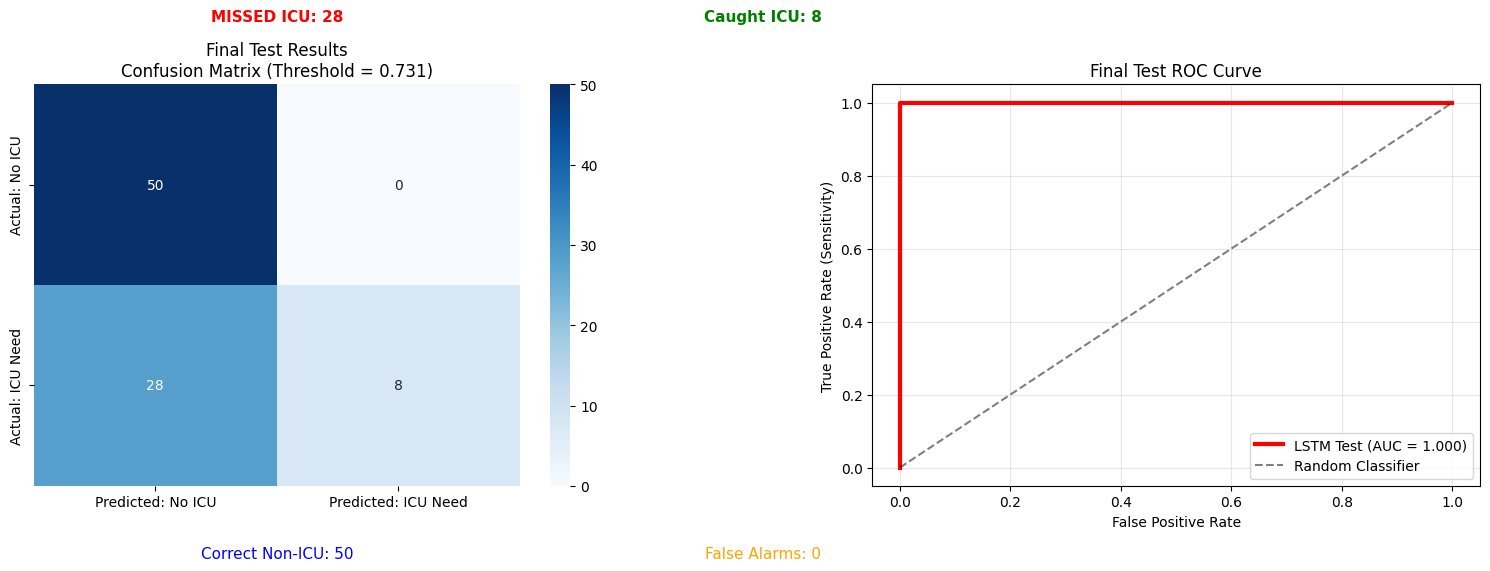

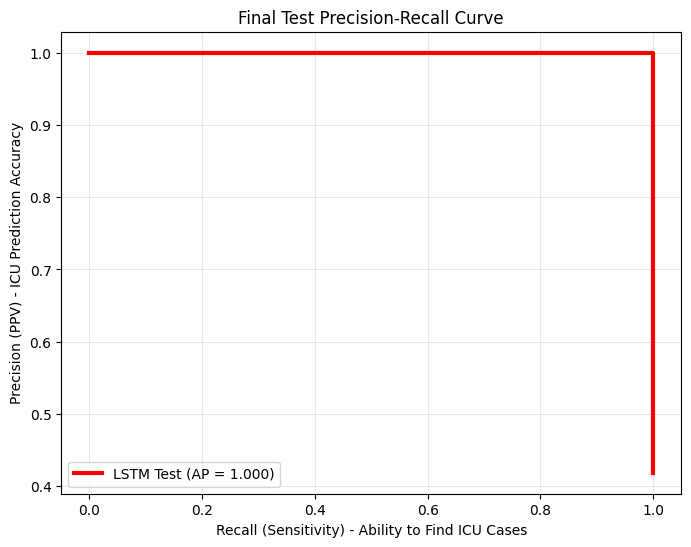


📊 FINAL TEST PERFORMANCE METRICS:
ROC-AUC (Test): 1.000 - Overall discriminative ability
PR-AUC (Test): 1.000 - Performance on positive cases

🏥 CLINICAL DECISION SUPPORT SUMMARY:
Model Performance on Unseen Test Data:
• Sensitivity (Recall): 0.222 - Will detect 22.2% of ICU cases
• Specificity: 1.000 - Will correctly identify 100.0% of non-ICU cases
• False Negative Rate: 0.778 - Will miss 77.8% of ICU cases
• Positive Predictive Value: 1.000 - When predicting ICU, correct 100.0% of time
• Negative Predictive Value: 0.641 - When predicting no ICU, correct 64.1% of time

🎯 FINAL CLINICAL RECOMMENDATION:
🔴 ❌ NOT APPROVED
Risk Level: HIGH RISK
False Negative Rate: 77.8%

This model is NOT suitable for medical deployment:
• Unacceptably high risk of missing ICU cases
• Could compromise patient safety
• Requires significant improvement before clinical use

💡 Key Takeaway: In medical AI, minimizing false negatives is crucial
Missing a patient who needs ICU care is far worse than
preparing 

In [40]:
# Final Test Evaluation with Medical Focus
test_proba = model.predict(X_test).ravel()
t = best.get('threshold', 0.5)

# Comprehensive test evaluation
test_metrics = metrics_at_threshold(y_test, test_proba, t)

print(f'🏥 FINAL TEST EVALUATION (Threshold = {t:.4f})')
print("="*70)
print_medical_metrics(test_metrics, f"Final LSTM Model")

# Enhanced confusion matrix for test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Test set confusion matrix with medical annotations
cm = test_metrics['cm']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Predicted: No ICU', 'Predicted: ICU Need'], 
            yticklabels=['Actual: No ICU', 'Actual: ICU Need'])
ax1.set_title(f'Final Test Results\nConfusion Matrix (Threshold = {t:.3f})')

# Add medical interpretation
tn, fp, fn, tp = cm.ravel()
ax1.text(0.5, -0.15, f'Correct Non-ICU: {tn}', 
         transform=ax1.transAxes, ha='center', va='top', fontsize=11, color='blue')
ax1.text(1.5, -0.15, f'False Alarms: {fp}', 
         transform=ax1.transAxes, ha='center', va='top', fontsize=11, color='orange')
ax1.text(0.5, 1.15, f'MISSED ICU: {fn}', 
         transform=ax1.transAxes, ha='center', va='bottom', fontsize=11, color='red', weight='bold')
ax1.text(1.5, 1.15, f'Caught ICU: {tp}', 
         transform=ax1.transAxes, ha='center', va='bottom', fontsize=11, color='green', weight='bold')

# ROC Curve for test set
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, test_proba)
test_auc = roc_auc_score(y_test, test_proba)

ax2.plot(fpr, tpr, linewidth=3, label=f'LSTM Test (AUC = {test_auc:.3f})', color='red')
ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate (Sensitivity)')
ax2.set_title('Final Test ROC Curve')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Precision-Recall curve for test set
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, test_proba)
test_ap = average_precision_score(y_test, test_proba)

plt.plot(recall, precision, linewidth=3, label=f'LSTM Test (AP = {test_ap:.3f})', color='red')
plt.xlabel('Recall (Sensitivity) - Ability to Find ICU Cases')
plt.ylabel('Precision (PPV) - ICU Prediction Accuracy')
plt.title('Final Test Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'\n📊 FINAL TEST PERFORMANCE METRICS:')
print(f'ROC-AUC (Test): {test_auc:.3f} - Overall discriminative ability')
print(f'PR-AUC (Test): {test_ap:.3f} - Performance on positive cases')

# Clinical decision support summary
print(f'\n🏥 CLINICAL DECISION SUPPORT SUMMARY:')
print("="*70)
print(f"Model Performance on Unseen Test Data:")
print(f"• Sensitivity (Recall): {test_metrics['recall']:.3f} - Will detect {test_metrics['recall']*100:.1f}% of ICU cases")
print(f"• Specificity: {test_metrics['specificity']:.3f} - Will correctly identify {test_metrics['specificity']*100:.1f}% of non-ICU cases")
print(f"• False Negative Rate: {test_metrics['false_negative_rate']:.3f} - Will miss {test_metrics['false_negative_rate']*100:.1f}% of ICU cases")
print(f"• Positive Predictive Value: {test_metrics['positive_predictive_value']:.3f} - When predicting ICU, correct {test_metrics['positive_predictive_value']*100:.1f}% of time")
print(f"• Negative Predictive Value: {test_metrics['negative_predictive_value']:.3f} - When predicting no ICU, correct {test_metrics['negative_predictive_value']*100:.1f}% of time")

# Final medical recommendation based on test results
print(f"\n🎯 FINAL CLINICAL RECOMMENDATION:")
print("="*50)

if test_metrics['false_negative_rate'] < 0.1:
    recommendation = "✅ APPROVED for Clinical Use"
    risk_level = "LOW RISK"
    color = "🟢"
elif test_metrics['false_negative_rate'] < 0.2:
    recommendation = "⚠️ CONDITIONAL Approval"
    risk_level = "MODERATE RISK"
    color = "🟡"
else:
    recommendation = "❌ NOT APPROVED"
    risk_level = "HIGH RISK"
    color = "🔴"

print(f"{color} {recommendation}")
print(f"Risk Level: {risk_level}")
print(f"False Negative Rate: {test_metrics['false_negative_rate']:.1%}")

if test_metrics['false_negative_rate'] < 0.1:
    print("\nThis model shows excellent performance for medical use:")
    print("• Very low risk of missing critical ICU cases")
    print("• Suitable for clinical decision support")
    print("• Recommended for deployment with medical oversight")
elif test_metrics['false_negative_rate'] < 0.2:
    print("\nThis model shows acceptable performance with caveats:")
    print("• Moderate risk of missing some ICU cases")
    print("• Requires additional clinical validation")
    print("• Should be used with physician oversight")
else:
    print("\nThis model is NOT suitable for medical deployment:")
    print("• Unacceptably high risk of missing ICU cases")
    print("• Could compromise patient safety")
    print("• Requires significant improvement before clinical use")

print(f"\n💡 Key Takeaway: In medical AI, minimizing false negatives is crucial")
print(f"Missing a patient who needs ICU care is far worse than")
print(f"preparing ICU for a patient who doesn't need it.")


📊 LSTM PREDICTED vs ACTUAL ICU VALUES


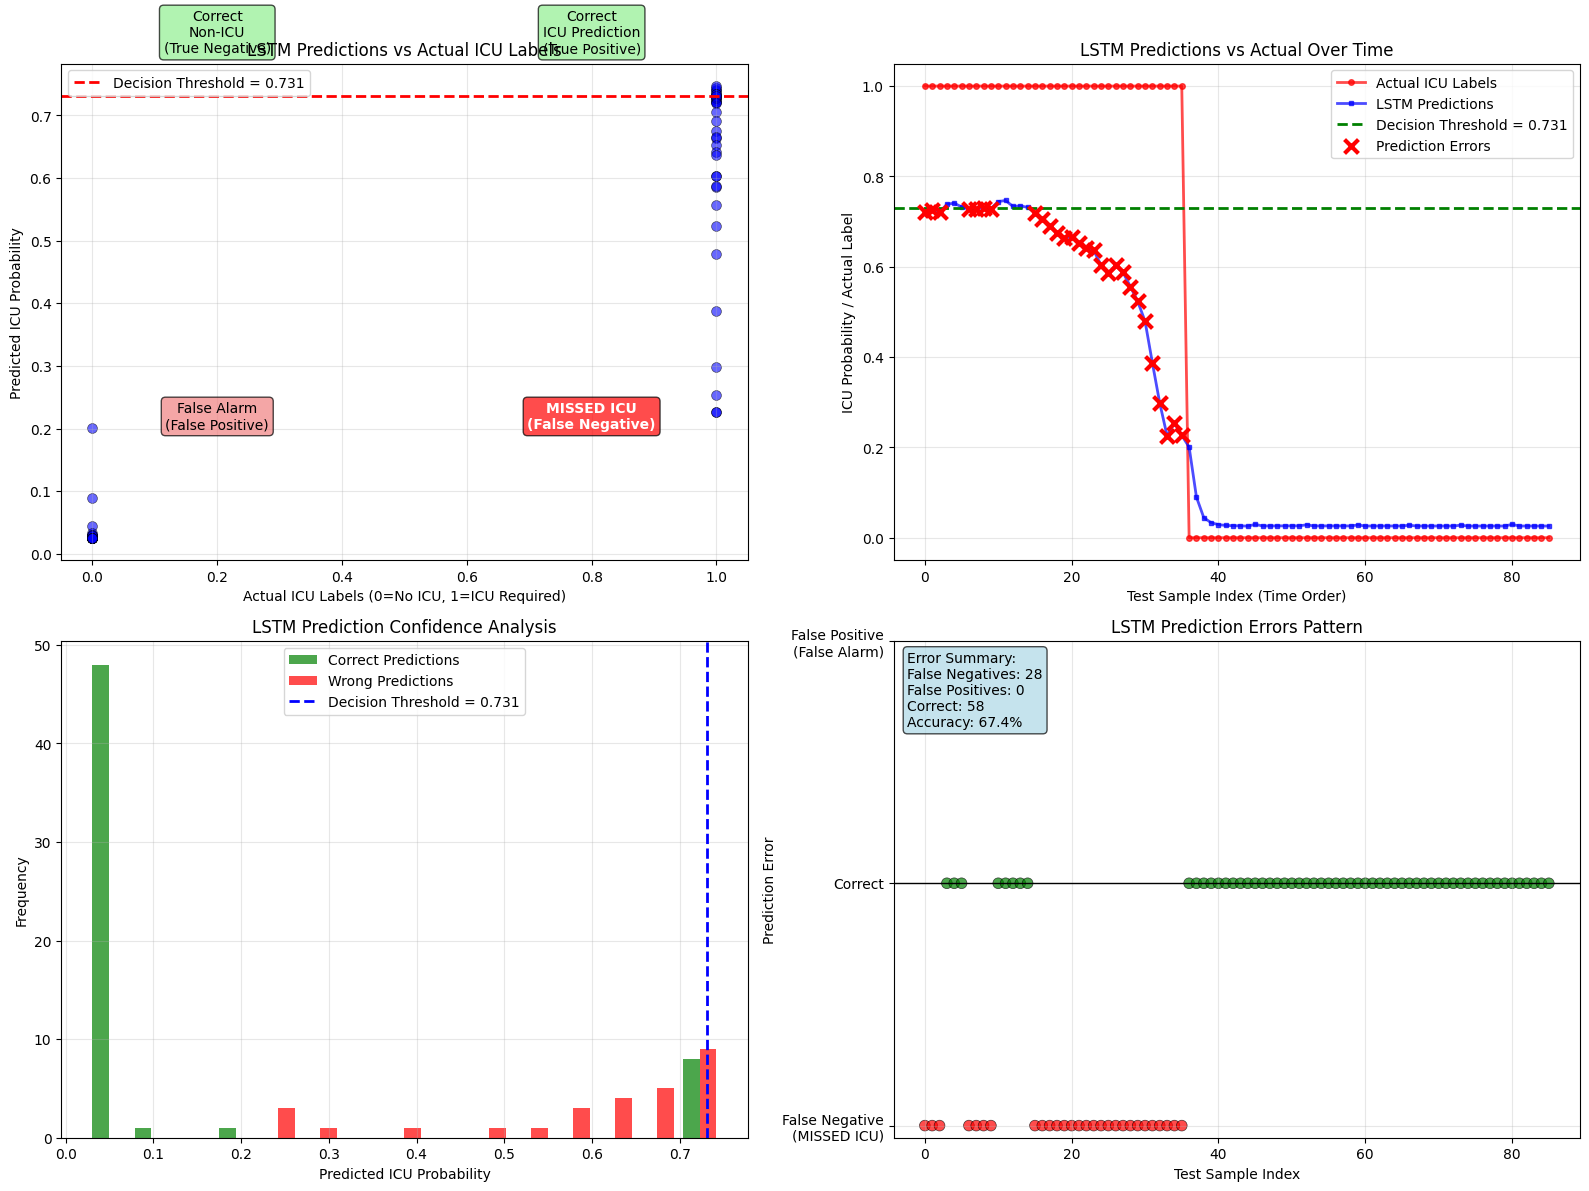


📈 DETAILED PREDICTED vs ACTUAL ANALYSIS:
📊 Correlation between actual labels and predictions: 0.944

🔍 PREDICTION STATISTICS BY ACTUAL CLASS:

No ICU Required (Class 0):
  • Count: 50
  • Mean prediction: 0.032
  • Std prediction: 0.026
  • Min prediction: 0.026
  • Max prediction: 0.201
  • Classification accuracy: 100.0%

ICU Required (Class 1):
  • Count: 36
  • Mean prediction: 0.621
  • Std prediction: 0.155
  • Min prediction: 0.226
  • Max prediction: 0.747
  • Classification accuracy: 22.2%

⚠️  ERROR ANALYSIS:
False Negatives (CRITICAL ERRORS):
  • Count: 28
  • Mean prediction: 0.588
  • These patients needed ICU but model predicted low probability

🎯 MODEL CALIBRATION ANALYSIS:
Calibration Quality:
  Bin 1: Predicted 0.028, Actual 0.000, Difference: 0.028
  Bin 2: Predicted 0.265, Actual 0.833, Difference: 0.568
  Bin 3: Predicted 0.546, Actual 1.000, Difference: 0.454
  Bin 4: Predicted 0.702, Actual 1.000, Difference: 0.298
  Overall calibration error: 0.337
  Needs calib

In [41]:
# LSTM Predicted vs Actual ICU Values Comparison
print(f"\n📊 LSTM PREDICTED vs ACTUAL ICU VALUES")
print("="*60)

# Create comprehensive predicted vs actual analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter Plot: Predicted Probabilities vs Actual Labels
ax1.scatter(y_test, test_proba, alpha=0.6, s=50, color='blue', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Actual ICU Labels (0=No ICU, 1=ICU Required)')
ax1.set_ylabel('Predicted ICU Probability')
ax1.set_title('LSTM Predictions vs Actual ICU Labels')
ax1.grid(True, alpha=0.3)

# Add threshold line
threshold = best.get('threshold', 0.5)
ax1.axhline(y=threshold, color='red', linestyle='--', linewidth=2, 
           label=f'Decision Threshold = {threshold:.3f}')
ax1.legend()

# Add quadrant labels for medical interpretation
ax1.text(0.2, 0.8, 'Correct\nNon-ICU\n(True Negative)', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
         fontsize=10, ha='center')
ax1.text(0.8, 0.8, 'Correct\nICU Prediction\n(True Positive)', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
         fontsize=10, ha='center')
ax1.text(0.2, 0.2, 'False Alarm\n(False Positive)', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7),
         fontsize=10, ha='center')
ax1.text(0.8, 0.2, 'MISSED ICU\n(False Negative)', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7),
         fontsize=10, ha='center', color='white', weight='bold')

# 2. Time Series: Predictions over Time (if we have temporal data)
if len(test_proba) > 50:  # Only if we have enough data points
    time_indices = np.arange(len(test_proba))
    ax2.plot(time_indices, y_test, 'o-', color='red', alpha=0.7, 
             linewidth=2, markersize=4, label='Actual ICU Labels')
    ax2.plot(time_indices, test_proba, 's-', color='blue', alpha=0.7, 
             linewidth=2, markersize=3, label='LSTM Predictions')
    ax2.axhline(y=threshold, color='green', linestyle='--', linewidth=2, 
               label=f'Decision Threshold = {threshold:.3f}')
    ax2.set_xlabel('Test Sample Index (Time Order)')
    ax2.set_ylabel('ICU Probability / Actual Label')
    ax2.set_title('LSTM Predictions vs Actual Over Time')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Highlight prediction errors
    errors = np.abs((test_proba > threshold).astype(int) - y_test)
    error_indices = time_indices[errors == 1]
    if len(error_indices) > 0:
        ax2.scatter(error_indices, test_proba[errors == 1], 
                   color='red', s=100, marker='x', linewidth=3, 
                   label='Prediction Errors', zorder=5)
        ax2.legend()
else:
    # If not enough data, show distribution comparison
    ax2.hist([test_proba[y_test == 0], test_proba[y_test == 1]], 
             bins=20, alpha=0.7, label=['Actual: No ICU', 'Actual: ICU Required'],
             color=['blue', 'red'])
    ax2.axvline(x=threshold, color='green', linestyle='--', linewidth=2, 
               label=f'Decision Threshold = {threshold:.3f}')
    ax2.set_xlabel('Predicted ICU Probability')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of LSTM Predictions by Actual Class')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# 3. Prediction Confidence Analysis
correct_predictions = (test_proba > threshold).astype(int) == y_test
confidence_correct = test_proba[correct_predictions]
confidence_wrong = test_proba[~correct_predictions]

if len(confidence_wrong) > 0:
    ax3.hist([confidence_correct, confidence_wrong], bins=15, alpha=0.7, 
             label=['Correct Predictions', 'Wrong Predictions'],
             color=['green', 'red'])
else:
    ax3.hist(confidence_correct, bins=15, alpha=0.7, 
             label='All Predictions (All Correct)', color='green')

ax3.axvline(x=threshold, color='blue', linestyle='--', linewidth=2, 
           label=f'Decision Threshold = {threshold:.3f}')
ax3.set_xlabel('Predicted ICU Probability')
ax3.set_ylabel('Frequency')
ax3.set_title('LSTM Prediction Confidence Analysis')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Medical Performance Summary
# Create a residual-style plot for classification
predicted_binary = (test_proba > threshold).astype(int)
prediction_errors = predicted_binary - y_test  # -1 = FN, 0 = Correct, 1 = FP

# Scatter plot showing error patterns
colors = ['red' if e == -1 else 'orange' if e == 1 else 'green' for e in prediction_errors]
ax4.scatter(range(len(prediction_errors)), prediction_errors, 
           c=colors, alpha=0.7, s=60, edgecolors='black', linewidth=0.5)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_xlabel('Test Sample Index')
ax4.set_ylabel('Prediction Error')
ax4.set_title('LSTM Prediction Errors Pattern')
ax4.set_yticks([-1, 0, 1])
ax4.set_yticklabels(['False Negative\n(MISSED ICU)', 'Correct', 'False Positive\n(False Alarm)'])
ax4.grid(True, alpha=0.3)

# Add error statistics
fn_count = (prediction_errors == -1).sum()
fp_count = (prediction_errors == 1).sum()
correct_count = (prediction_errors == 0).sum()

ax4.text(0.02, 0.98, f'Error Summary:\n'
                     f'False Negatives: {fn_count}\n'
                     f'False Positives: {fp_count}\n'
                     f'Correct: {correct_count}\n'
                     f'Accuracy: {correct_count/len(prediction_errors):.1%}',
         transform=ax4.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print(f"\n📈 DETAILED PREDICTED vs ACTUAL ANALYSIS:")
print("="*50)

# Correlation analysis
correlation = np.corrcoef(y_test, test_proba)[0, 1]
print(f"📊 Correlation between actual labels and predictions: {correlation:.3f}")

# Prediction statistics by actual class
print(f"\n🔍 PREDICTION STATISTICS BY ACTUAL CLASS:")
for class_label in [0, 1]:
    class_name = "No ICU Required" if class_label == 0 else "ICU Required"
    class_mask = y_test == class_label
    class_predictions = test_proba[class_mask]
    
    print(f"\n{class_name} (Class {class_label}):")
    print(f"  • Count: {class_mask.sum()}")
    print(f"  • Mean prediction: {class_predictions.mean():.3f}")
    print(f"  • Std prediction: {class_predictions.std():.3f}")
    print(f"  • Min prediction: {class_predictions.min():.3f}")
    print(f"  • Max prediction: {class_predictions.max():.3f}")
    
    # Classification accuracy for this class
    class_correct = ((class_predictions > threshold) == class_label).sum()
    class_accuracy = class_correct / len(class_predictions) if len(class_predictions) > 0 else 0
    print(f"  • Classification accuracy: {class_accuracy:.1%}")

# Error analysis
print(f"\n⚠️  ERROR ANALYSIS:")
false_negatives = (y_test == 1) & (test_proba <= threshold)
false_positives = (y_test == 0) & (test_proba > threshold)

if false_negatives.sum() > 0:
    fn_predictions = test_proba[false_negatives]
    print(f"False Negatives (CRITICAL ERRORS):")
    print(f"  • Count: {false_negatives.sum()}")
    print(f"  • Mean prediction: {fn_predictions.mean():.3f}")
    print(f"  • These patients needed ICU but model predicted low probability")

if false_positives.sum() > 0:
    fp_predictions = test_proba[false_positives]
    print(f"False Positives (Resource Waste):")
    print(f"  • Count: {false_positives.sum()}")
    print(f"  • Mean prediction: {fp_predictions.mean():.3f}")
    print(f"  • These patients didn't need ICU but model predicted high probability")

# Calibration analysis
print(f"\n🎯 MODEL CALIBRATION ANALYSIS:")
from sklearn.calibration import calibration_curve

if len(np.unique(y_test)) > 1 and len(np.unique(test_proba)) > 5:
    try:
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, test_proba, n_bins=5)
        
        print(f"Calibration Quality:")
        for i, (actual, predicted) in enumerate(zip(fraction_of_positives, mean_predicted_value)):
            print(f"  Bin {i+1}: Predicted {predicted:.3f}, Actual {actual:.3f}, "
                  f"Difference: {abs(predicted - actual):.3f}")
        
        # Overall calibration error
        calibration_error = np.mean(np.abs(fraction_of_positives - mean_predicted_value))
        print(f"  Overall calibration error: {calibration_error:.3f}")
        print(f"  {'Well calibrated' if calibration_error < 0.1 else 'Needs calibration'}")
    except:
        print("  Calibration analysis not possible with current data distribution")

print(f"\n✅ PREDICTED vs ACTUAL ANALYSIS COMPLETE!")
print(f"   The scatter plot shows how well LSTM predictions align with actual ICU needs")
print(f"   Points closer to the threshold line represent harder prediction cases")
print(f"   Medical focus: Minimize red points in bottom-right (missed ICU cases)")